In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


dtype = {'file' : 'str', 'time' : np.float64, '#nodes' : np.float64, 'pathlength' : np.float64, 'horizon' : np.float64, '#moves' : np.float64, 'init_conflicts' : np.float64}

df = pd.read_csv("./benchmarkResults/cbs1.csv", dtype = dtype)
dfg = pd.read_csv("./benchmarkResults/greedy1.csv", dtype = dtype)

df

,file,time,#nodes,pathlength,horizon,#moves,init_conflicts
0,benchmark_examples/size5x5/density20/ex1.lp,0.026977,3.0,1.0,5.0,13.0,2.0
1,benchmark_examples/size5x5/density20/ex10.lp,0.119240,7.0,2.0,5.0,21.0,6.0
2,benchmark_examples/size5x5/density20/ex2.lp,0.262581,13.0,4.0,6.0,23.0,8.0
3,benchmark_examples/size5x5/density20/ex3.lp,0.007507,2.0,0.0,4.0,11.0,0.0
4,benchmark_examples/size5x5/density20/ex4.lp,0.030966,3.0,1.0,4.0,14.0,2.0
...,...,...,...,...,...,...,...
195,benchmark_examples/size8x8/density40/ex5.lp,NaN,NaN,NaN,NaN,NaN,NaN
196,benchmark_examples/size8x8/density40/ex6.lp,NaN,NaN,NaN,NaN,NaN,NaN
197,benchmark_examples/size8x8/density40/ex7.lp,NaN,NaN,NaN,NaN,NaN,NaN
198,benchmark_examples/size8x8/density40/ex8.lp,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
def size(row):
    return int(str(row["file"]).split("/")[1][-1])

def density(row):
    return int(str(row["file"]).split("/")[2][-2:])

def ex(row):
    return int(str(row["file"]).split("/")[3].split(".")[0].split("x")[1])

df['size'] = df.apply(lambda row: size(row), axis=1)
df['density'] = df.apply(lambda row: density(row), axis=1)
df['ex'] = df.apply(lambda row: ex(row), axis=1)

dfg['size'] = df.apply(lambda row: size(row), axis=1)
dfg['density'] = df.apply(lambda row: density(row), axis=1)
dfg['ex'] = df.apply(lambda row: ex(row), axis=1)

In [3]:
# sort data by size + density

def sort_by_category(to_sort):
    '''returns list of DataFrames'''
    lcg = [] #(List of Categorised Groups)
    for i in range(int((len(to_sort))/10)):
        lcg.append(to_sort.iloc[(i*10):(i*10+10)])
    return lcg

# list of DataFrames, split by size + density
catList = sort_by_category(df)
greedyCatList = sort_by_category(dfg)

# for every df in received list, 
# calculate how many NaN rows are in there
# returns: list of int

def nan_counter(cat_df):
    lc = [] # List of Counts
    for elem in cat_df:
        counter = 0
        for i in range(10):
            if np.isnan(elem["time"].iloc[i]):
                counter += 1
        lc.append(counter)
    return lc

# list of NaN rows in cat_list df
nanList = nan_counter(catList)
greedyNanList = nan_counter(greedyCatList)

print(nanList)
print()

# calculate list of mean times 
def mean_list(df_list, nan_List):
    l = []
    counter = 0
    length = len(df_list[0])
    for elem in df_list:
        tempMean = elem.mean()[0]
        locNans = nan_List[counter]
        if(locNans != 0):
            if(locNans == length):
                tempMean = 300
            else: 
                tempMean = (tempMean * (length - locNans) + locNans * 300) / length
        l.append(tempMean)
        counter += 1
    return l

# list of mean times for each size + density combination
mean = mean_list(catList, nanList)
greedyMean = mean_list(greedyCatList, greedyNanList)
print(mean)

[0, 0, 0, 0, 1, 0, 0, 2, 4, 8, 0, 1, 3, 9, 9, 1, 5, 9, 10, 10]

[0.07997403679764829, 0.20635755550465545, 0.24728495688759722, 4.594714571005897, 36.97470663119748, 9.446473872309435, 3.6777116313081932, 86.10836699590145, 142.1369115272042, 264.39002846740186, 2.1611194005963625, 34.89692563439894, 148.54677808179696, 270.23168909740053, 273.07270249160064, 87.45164979289693, 196.640190087902, 279.82336908630094, 300, 300]


In [4]:
def plotDensity(m,nl):
    points = [20,25,30,35,40]
    
    maxM = max(m)

    fig = plt.figure()
    ax1 = fig.add_subplot(2, 3, 1)
    ax2 = fig.add_subplot(2, 3, 2, sharey=ax1, sharex=ax1)
    ax3 = fig.add_subplot(2, 3, 3, sharey=ax1, sharex=ax1)
    ax4 = fig.add_subplot(2, 3, 4, sharey=ax1, sharex=ax1)

    ax1.scatter(points, m[:5])
    ax2.scatter(points, m[5:10])
    ax3.scatter(points, m[10:15])
    ax4.scatter(points, m[15:])
    
    ax1.set_xlabel('density in %')
    ax1.set_ylabel('time in s')
    ax1.set_title('size: 5x5')
    ax2.set_xlabel('density in %')
    ax2.set_ylabel('time in s')
    ax2.set_title('size: 6x6')
    ax3.set_xlabel('density in %')
    ax3.set_ylabel('time in s')
    ax3.set_title('size: 7x7')
    ax4.set_xlabel('density in %')
    ax4.set_ylabel('time in s')
    ax4.set_title('size: 8x8')
    
    i = 0
    while i<20:
        if nl[i] > 3:
            if i < 5:
                ax1.vlines(points[i%5]-1, 0, maxM, color="red")
                i=5
                continue
            elif i < 10:
                ax2.vlines(points[i%5]-1, 0, maxM, color="red")
                i=10
                continue
            elif i < 15:
                ax3.vlines(points[i%5]-1, 0, maxM, color="red")
                i=15
                continue
            else:
                ax4.vlines(points[i%5]-1, 0, maxM, color="red")
                break
        i+=1

    fig.set_size_inches(8, 6, forward=True)
    fig.tight_layout()


    ax1.grid()
    ax2.grid()
    ax3.grid()
    ax4.grid()

    plt.show()
    
def plotSize(m, nl):
    points = [5,6,7,8]
    
    maxM = max(m)

    fig = plt.figure()
    ax1 = fig.add_subplot(2, 3, 1)
    ax2 = fig.add_subplot(2, 3, 2, sharey=ax1, sharex=ax1)
    ax3 = fig.add_subplot(2, 3, 3, sharey=ax1, sharex=ax1)
    ax4 = fig.add_subplot(2, 3, 4, sharey=ax1, sharex=ax1)
    ax5 = fig.add_subplot(2, 3, 5, sharey=ax1, sharex=ax1)

    ax1.scatter(points, m[::5])

    for i in range(20)[::5]:
        if nl[i] > 3:
            ax1.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break

    ax2.scatter(points, m[1::5])

    for i in range(20)[1::5]:
        if nl[i] > 3:
            ax2.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break

    ax3.scatter(points, m[2::5])

    for i in range(20)[2::5]:
        if nl[i] > 3:
            ax3.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break

    ax4.scatter(points, m[3::5])

    for i in range(20)[3::5]:
        if nl[i] > 3:
            ax4.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break

    ax5.scatter(points, m[4::5])

    for i in range(20)[4::5]:
        if nl[i] > 3:
            ax5.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break
            
    ax1.set_xlabel('instance size')
    ax1.set_ylabel('time in s')
    ax1.set_title('density: 20%')
    ax2.set_xlabel('instance size')
    ax2.set_ylabel('time in s')
    ax2.set_title('density: 25%')
    ax3.set_xlabel('instance size')
    ax3.set_ylabel('time in s')
    ax3.set_title('density: 30%')
    ax4.set_xlabel('instance size')
    ax4.set_ylabel('time in s')
    ax4.set_title('density: 35%')
    ax5.set_xlabel('instance size')
    ax5.set_ylabel('time in s')
    ax5.set_title('density: 40%')

    fig.set_size_inches(8, 6, forward=True)
    fig.tight_layout()

    ax1.grid()
    ax2.grid()
    ax3.grid()
    ax4.grid()
    ax5.grid()

    plt.show()

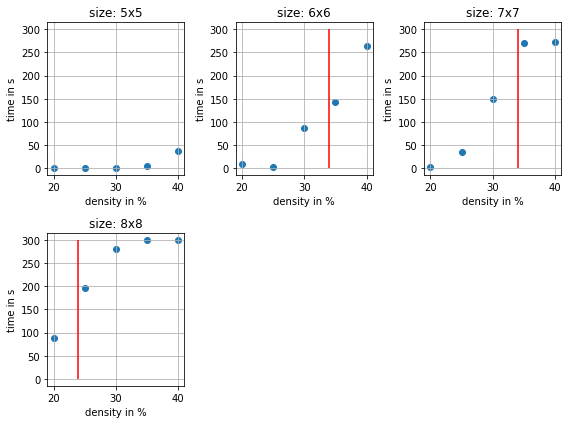

In [5]:
plotDensity(mean, nanList)

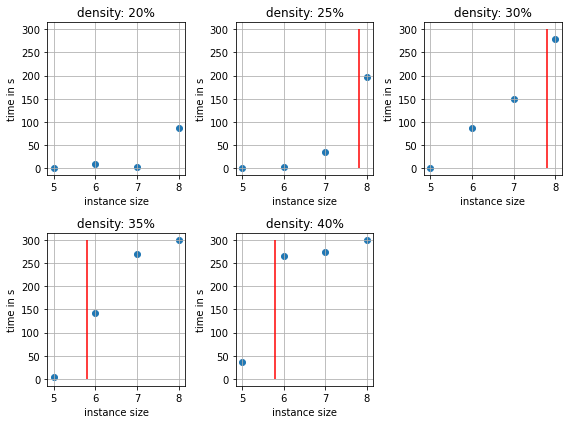

In [6]:
plotSize(mean, nanList)

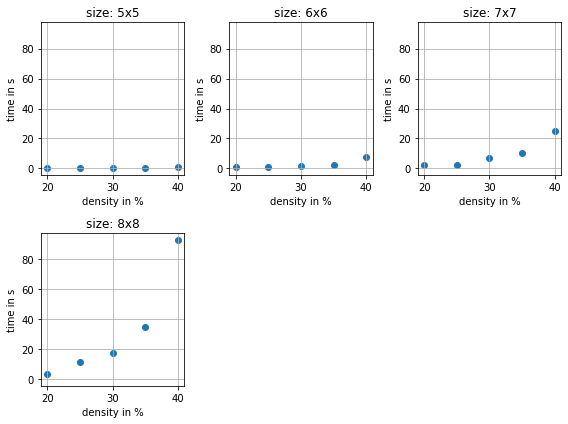

In [7]:
plotDensity(greedyMean, greedyNanList)

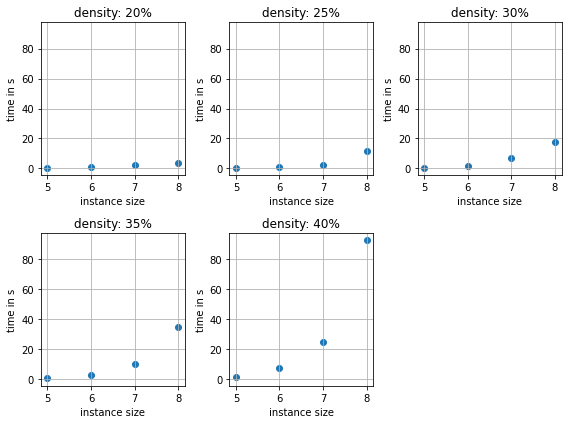

In [8]:
plotSize(greedyMean, greedyNanList)

In [15]:
def compareBar(cl1, cl2, category):
    points = [*range(1,11)]
    for i in range(len(cl1)):
        
        new_df = pd.DataFrame()
        new_df['ex'] = cl1[i]['ex']
        new_df[category] = cl1[i][category]
        new_df.insert(loc=1, column='greedy', value=False, allow_duplicates=True)

        new_gdf = pd.DataFrame()
        new_gdf['ex'] = cl2[i]['ex']
        new_gdf[category] = cl2[i][category]
        new_gdf.insert(loc=1, column='greedy', value=True, allow_duplicates=True)

        plotdf = new_df.append(new_gdf)

        plot = sns.catplot(x='ex', y=category, hue='greedy', data=plotdf, dodge=True, kind='bar')
        
        plot.set(title=f"size: {i // 5 + 5}, density: {(i % 5)*5 + 20}%")

        plt.xlabel('example number')
        plt.savefig(f'figures/comparisonGreedyVsNonGreedy_Size{i // 5 + 5}_Density{(i % 5)*5 + 20}_{category}.png', bbox_inches='tight')
        plt.show()

        
def compareScatterTimeExp(cl1, cl2, category):
    for i in range(len(catList)):

        fig = plt.figure()

        ax1 = fig.add_subplot(2, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)
        
        # [x, y]
        data = np.array([list(cl1[i][category]), list(cl1[i]['time'])])
        # data sorted by pathlength (x values)
        data = data[:, np.argsort( data[0] ) ]
        
        # remove NaN values
        new_data = []
        for arr in data:
            newrow = arr[~np.isnan(arr)]
            new_data.append(list(newrow))
        
        ax1.scatter(new_data[0], new_data[1])
        
        if(len(new_data[0])>2):
            # log plot cbs
            ylog_data = np.log(new_data[1]) 
            curve_fit = np.polyfit(new_data[0], ylog_data, 1)
            y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*np.array(new_data[0]))
            
            ax1.plot(new_data[0], y, c='orange')

            # lin plot cbs
            curve_fit = np.polyfit(new_data[0], new_data[1], 1)
            y = curve_fit[1] + (curve_fit[0]*np.array(new_data[0]))

            ax1.plot(new_data[0], y, c='black')

        dataG = np.array([list(cl2[i][category]), list(cl2[i]['time'])])
        dataG = dataG[:, np.argsort( dataG[0] ) ]

        new_dataG = []
        for arr in dataG:
            newrow = arr[~np.isnan(arr)]
            new_dataG.append(list(newrow))
        
        ax2.scatter(new_dataG[0], new_dataG[1])
        
        if(len(new_dataG[0])>2):
            # log plot greedy
            ylog_data = np.log(new_dataG[1]) 
            curve_fit = np.polyfit(new_dataG[0], ylog_data, 1)
            y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*np.array(new_dataG[0]))

            ax2.plot(new_dataG[0], y, c='orange')

            # lin plot greedy
            curve_fit = np.polyfit(new_dataG[0], new_dataG[1], 1)
            y = curve_fit[1] + (curve_fit[0]*np.array(new_dataG[0]))

            ax2.plot(new_dataG[0], y, c='black')
        
        # labels
        ax1.set_xlabel(category)
        ax1.set_ylabel('time')
        ax1.set_title('cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')
        ax2.set_xlabel(category)
        ax2.set_ylabel('time')
        ax2.set_title('greedy cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')

        fig.set_size_inches(8, 6, forward=True)
        fig.tight_layout()  

        ax1.grid()
        ax2.grid()
        

        plt.show()
        
def compareScatterExp(cl1, cl2, category1, category2):
    for i in range(len(catList)):

        fig = plt.figure()

        ax1 = fig.add_subplot(2, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)
        
        # [x, y]
        data = np.array([list(cl1[i][category1]), list(cl1[i][category2])])
        # data sorted by pathlength (x values)
        data = data[:, np.argsort( data[0] ) ]
        
        # remove NaN values
        new_data = []
        for arr in data:
            newrow = arr[~np.isnan(arr)]
            new_data.append(list(newrow))
        
        ax1.scatter(new_data[0], new_data[1])
        
        if(len(new_data[0])>2):
            # log plot cbs
            ylog_data = np.log(new_data[1]) 
            curve_fit = np.polyfit(new_data[0], ylog_data, 1)
            y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*np.array(new_data[0]))
            
            ax1.plot(new_data[0], y, c='orange')

            # lin plot cbs
            curve_fit = np.polyfit(new_data[0], new_data[1], 1)
            y = curve_fit[1] + (curve_fit[0]*np.array(new_data[0]))

            ax1.plot(new_data[0], y, c='black')

        dataG = np.array([list(cl2[i][category1]), list(cl2[i][category2])])
        dataG = dataG[:, np.argsort( dataG[0] ) ]

        new_dataG = []
        for arr in dataG:
            newrow = arr[~np.isnan(arr)]
            new_dataG.append(list(newrow))
        
        ax2.scatter(new_dataG[0], new_dataG[1])
        
        if(len(new_dataG[0])>2):
            # log plot greedy
            ylog_data = np.log(new_dataG[1]) 
            curve_fit = np.polyfit(new_dataG[0], ylog_data, 1)
            y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*np.array(new_dataG[0]))

            ax2.plot(new_dataG[0], y, c='orange')

            # lin plot greedy
            curve_fit = np.polyfit(new_dataG[0], new_dataG[1], 1)
            y = curve_fit[1] + (curve_fit[0]*np.array(new_dataG[0]))

            ax2.plot(new_dataG[0], y, c='black')
        
        # labels
        ax1.set_xlabel(category1)
        ax1.set_ylabel(category2)
        ax1.set_title('cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')
        ax2.set_xlabel(category1)
        ax2.set_ylabel(category2)
        ax2.set_title('greedy cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')

        fig.set_size_inches(8, 6, forward=True)
        fig.tight_layout()  

        ax1.grid()
        ax2.grid()
        

        plt.show()

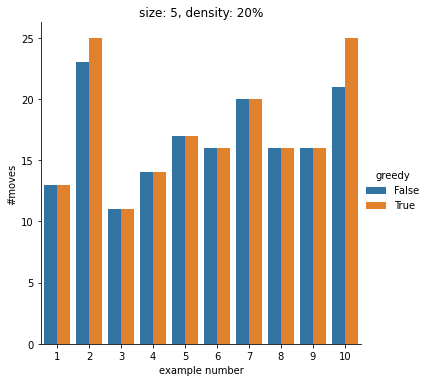

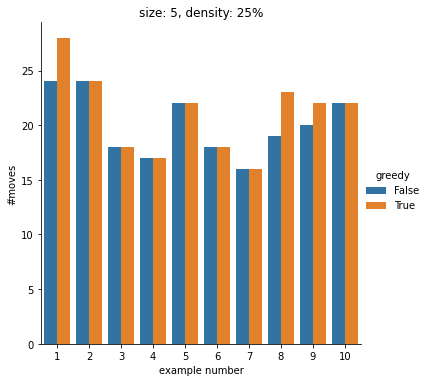

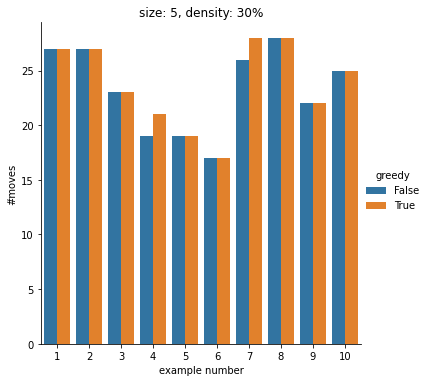

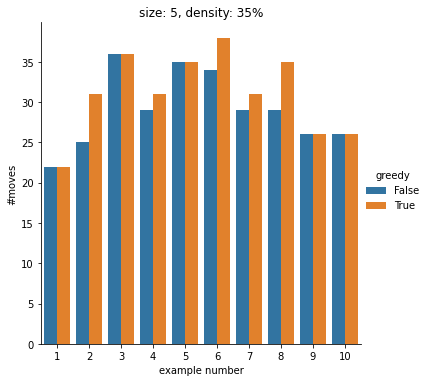

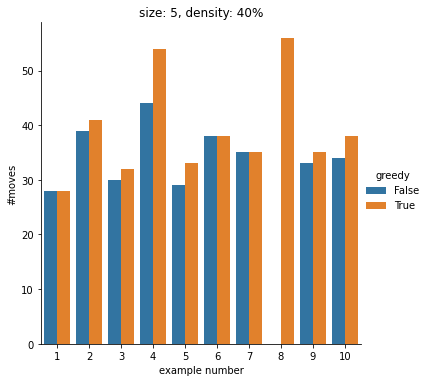

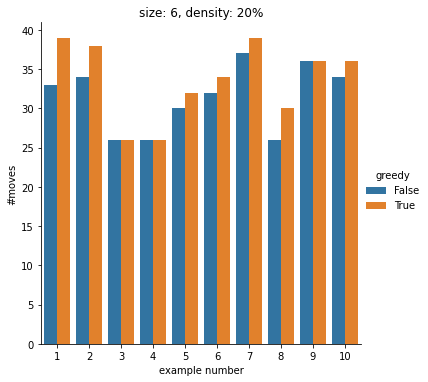

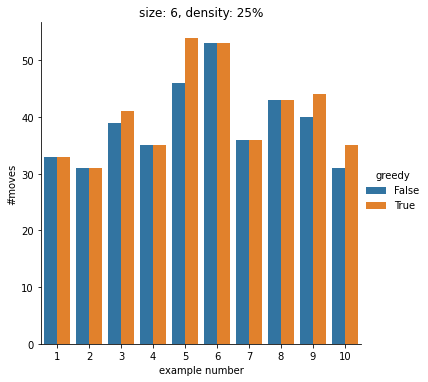

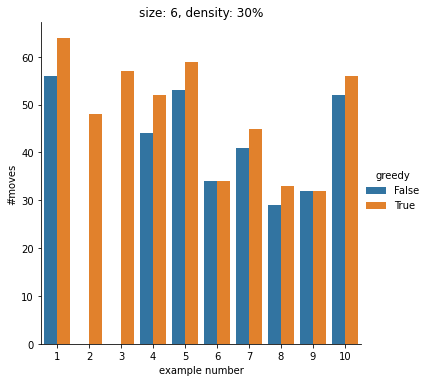

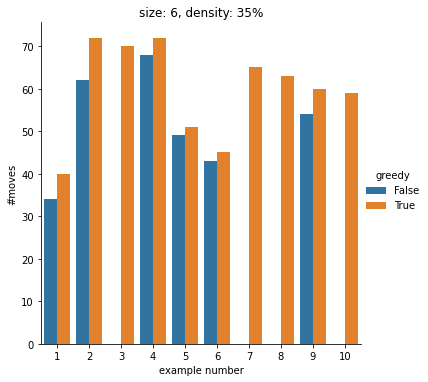

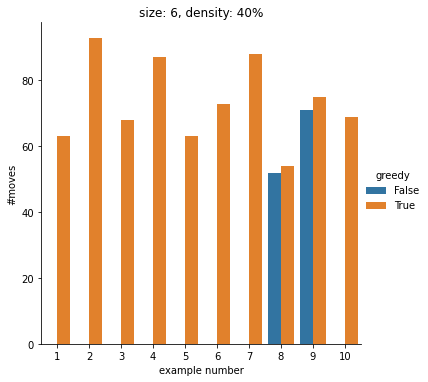

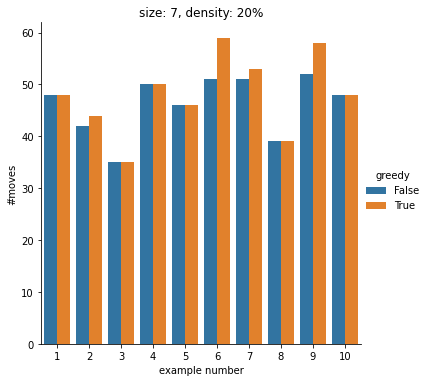

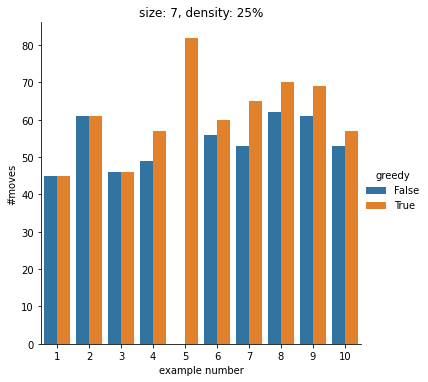

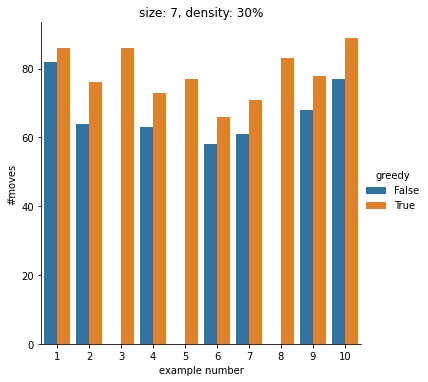

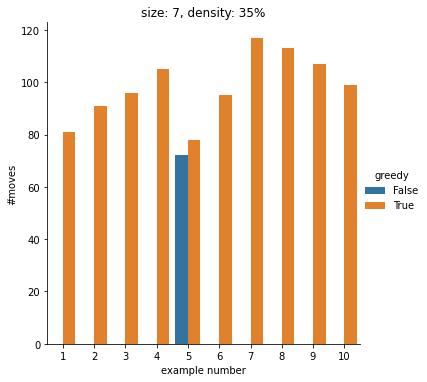

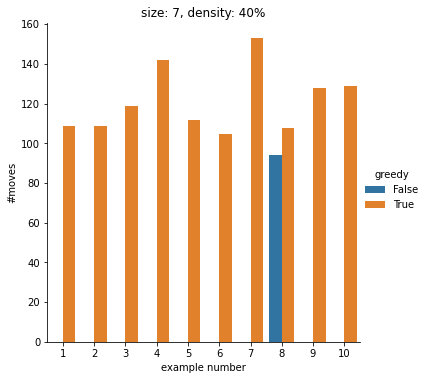

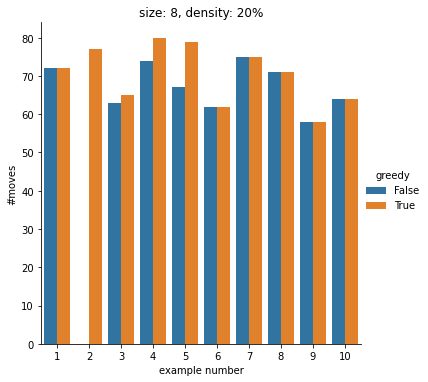

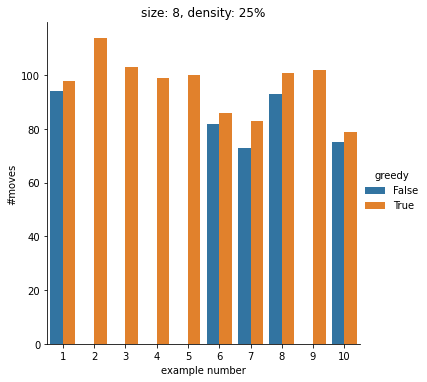

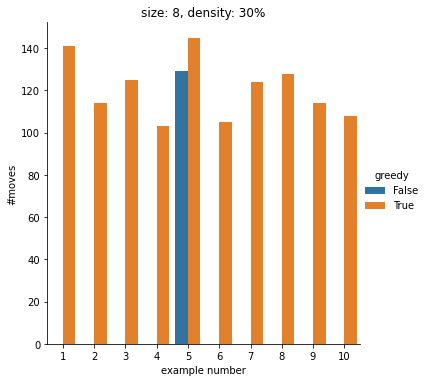

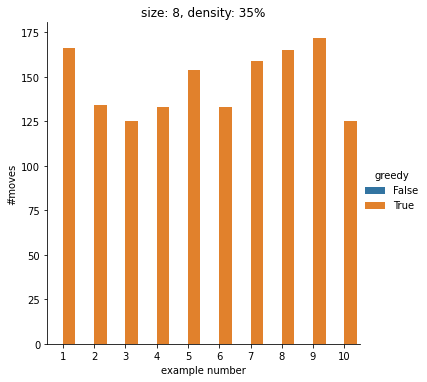

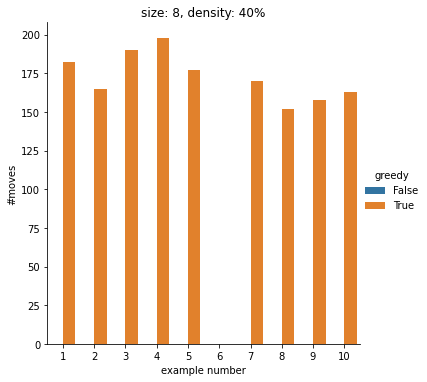

In [11]:
compareBar(catList, greedyCatList, '#moves')

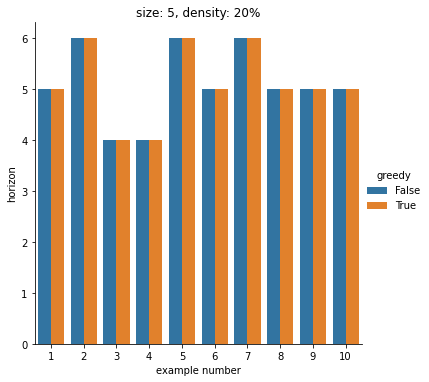

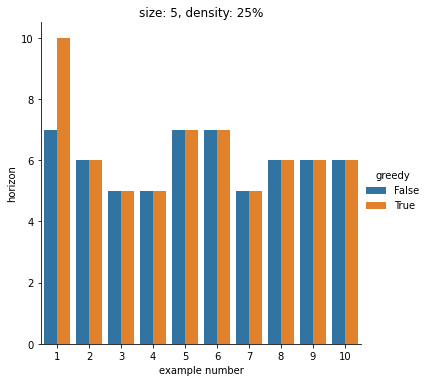

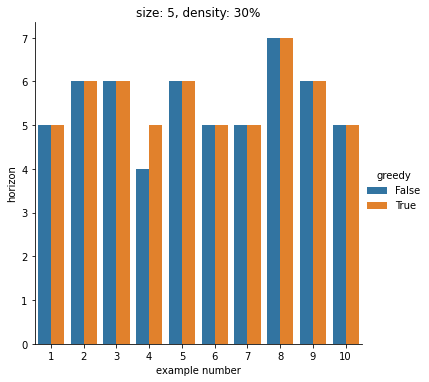

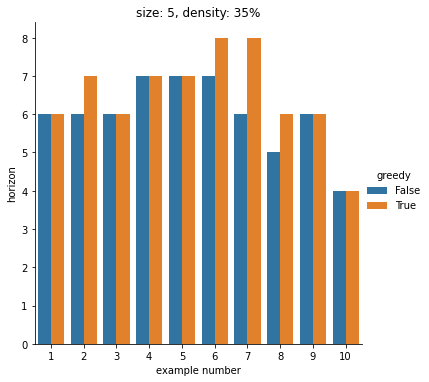

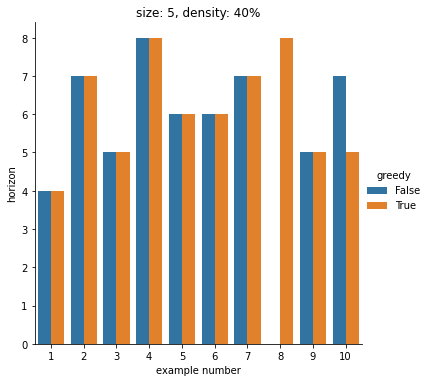

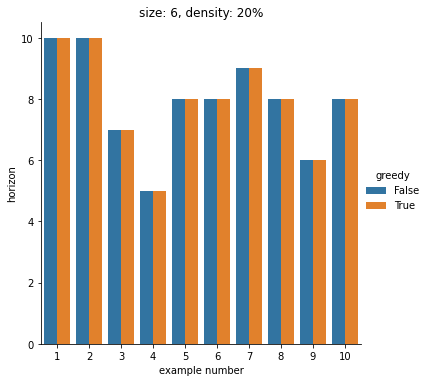

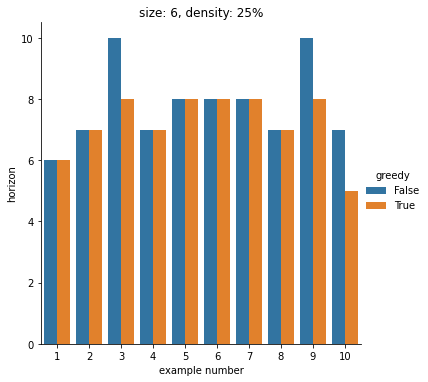

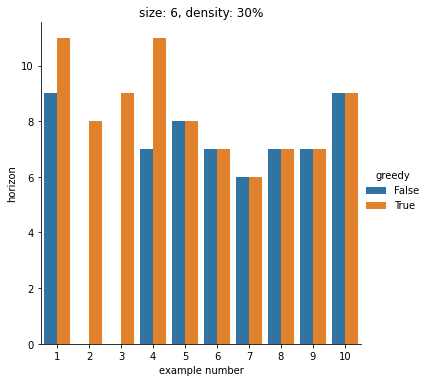

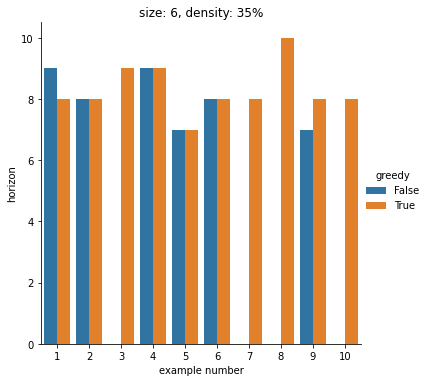

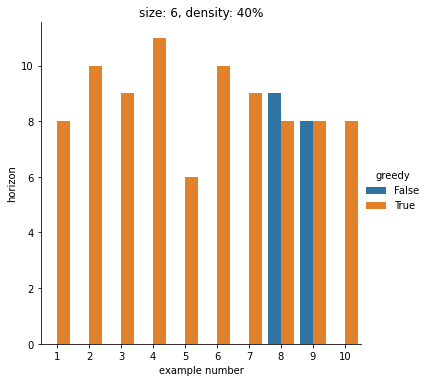

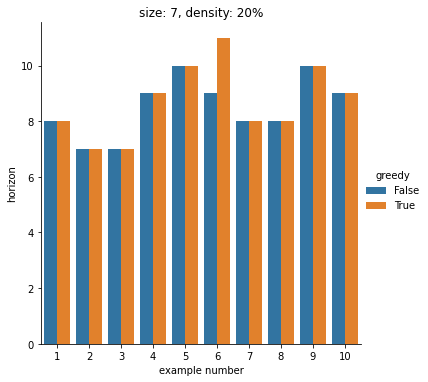

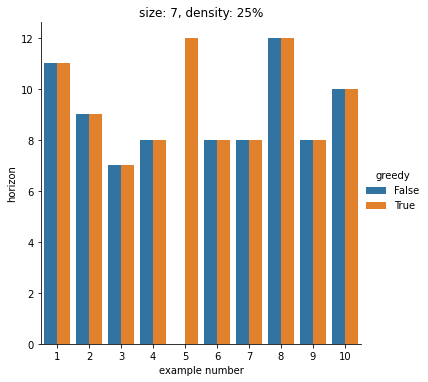

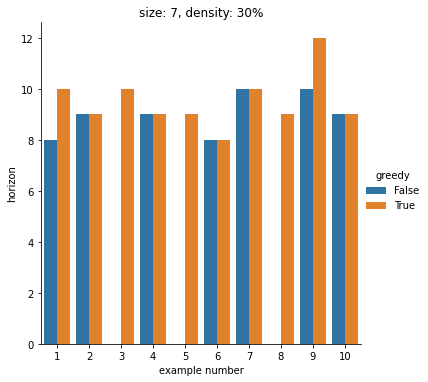

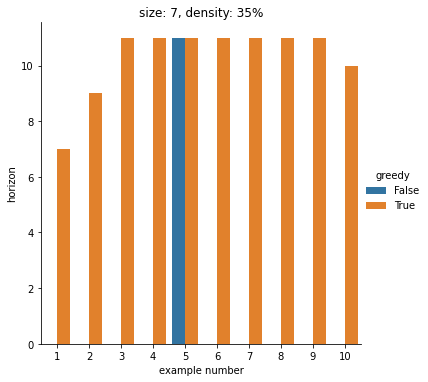

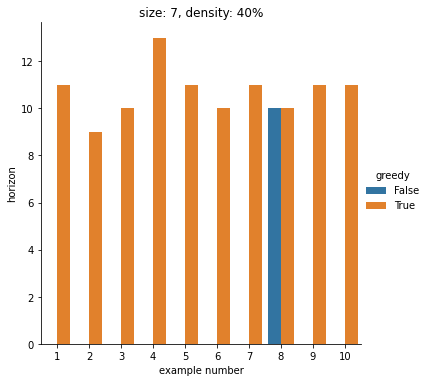

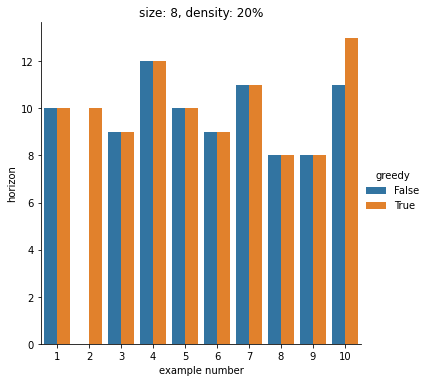

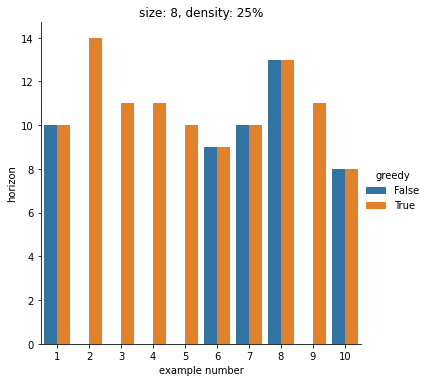

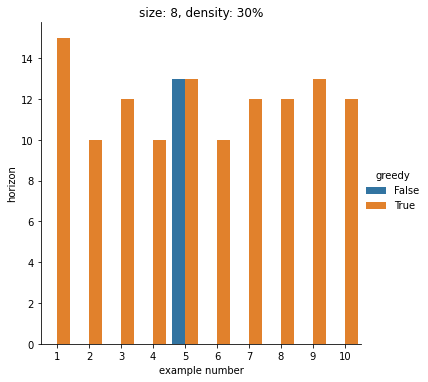

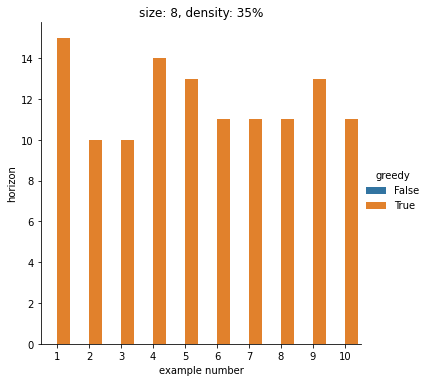

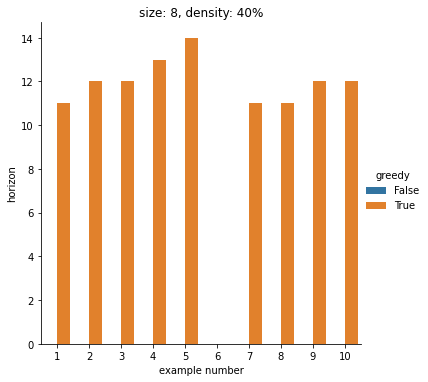

In [12]:
compareBar(catList, greedyCatList, 'horizon')

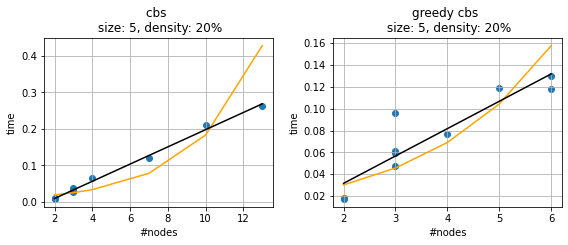

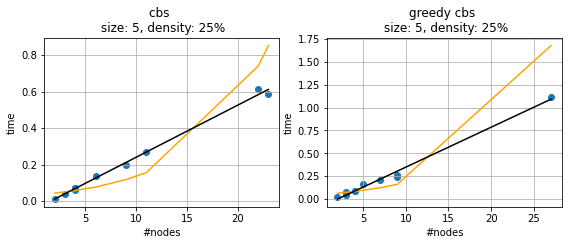

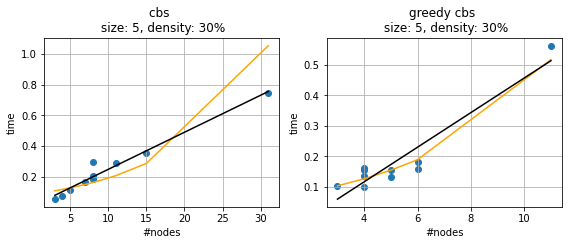

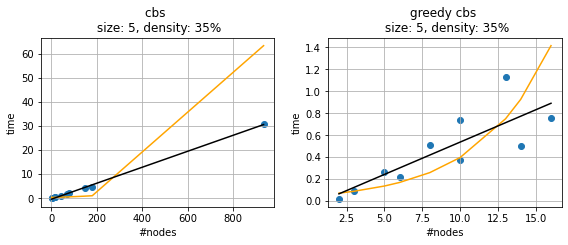

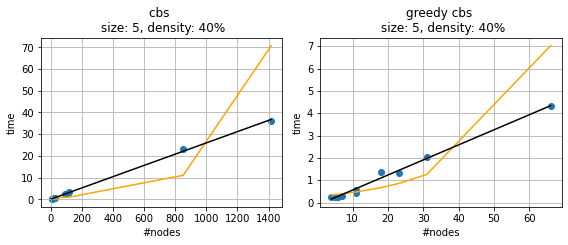

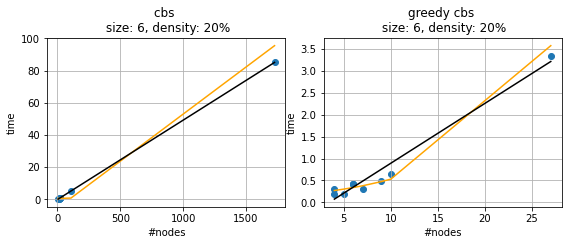

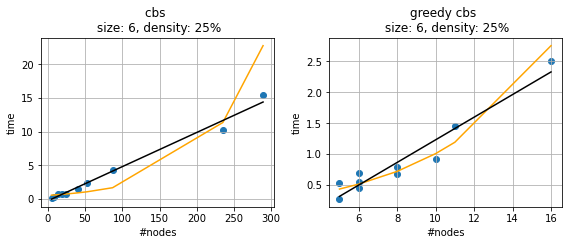

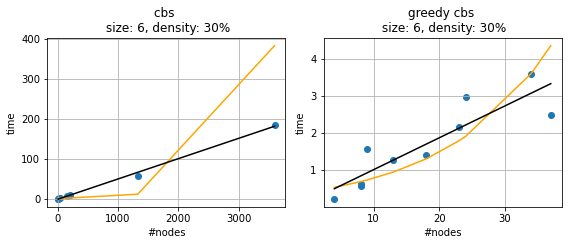

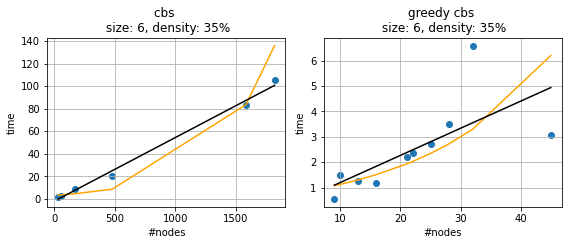

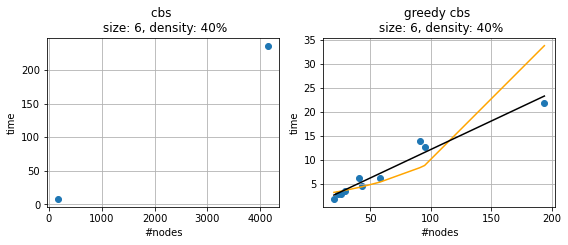

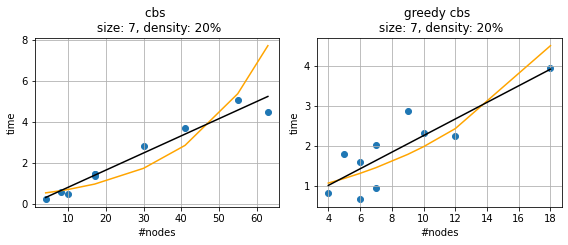

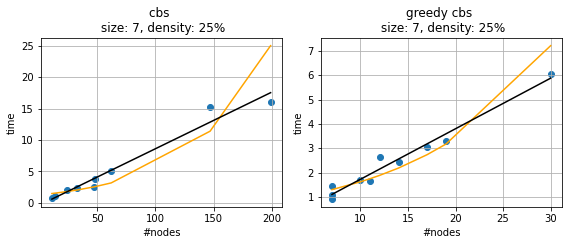

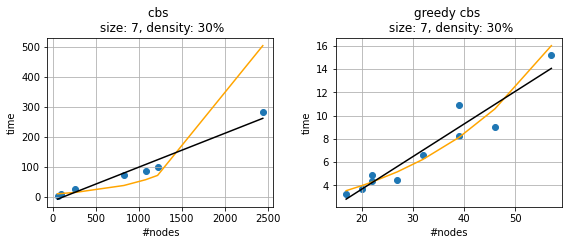

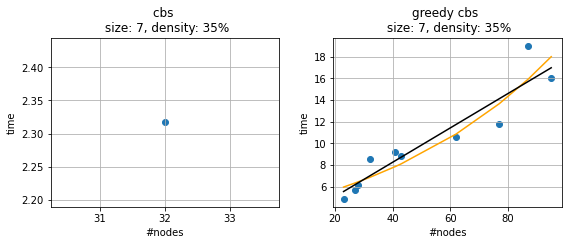

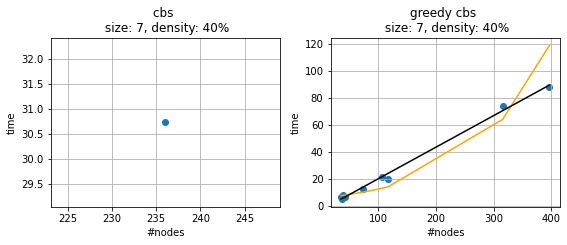

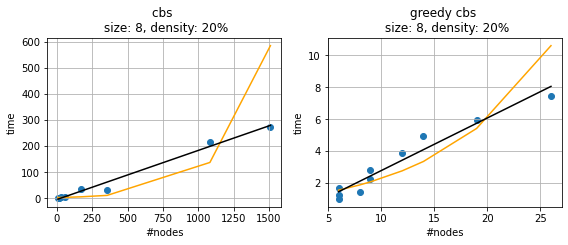

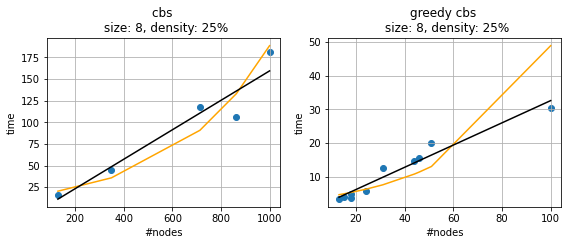

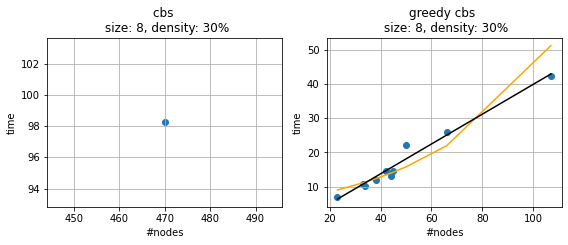

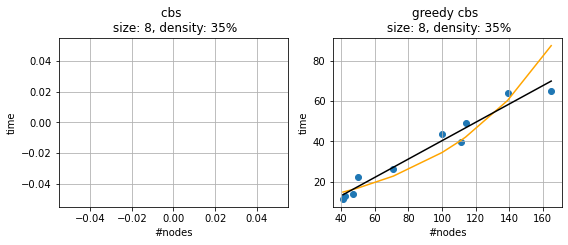

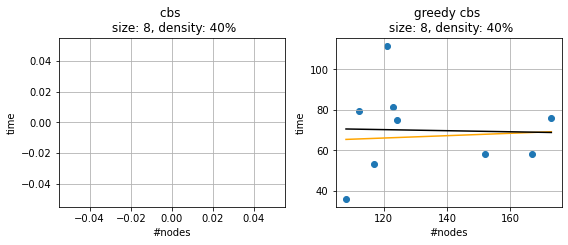

In [16]:
compareScatterTimeExp(catList, greedyCatList, '#nodes')

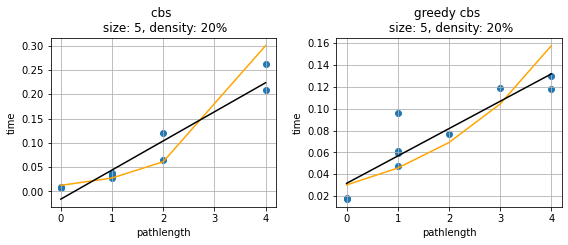

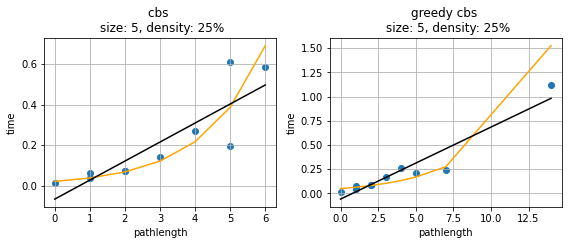

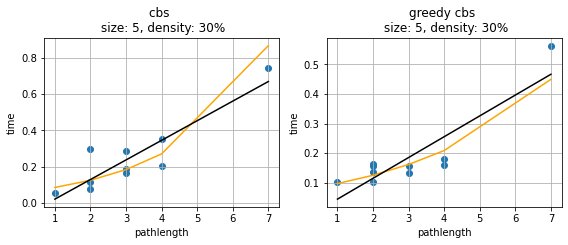

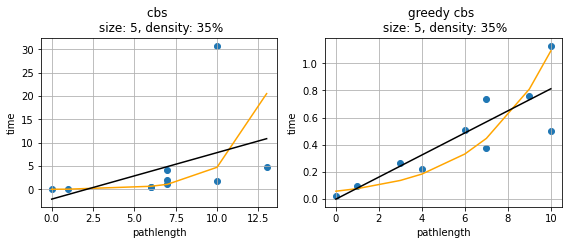

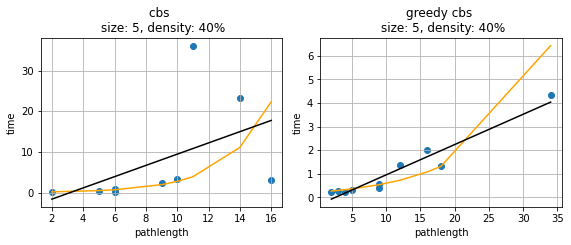

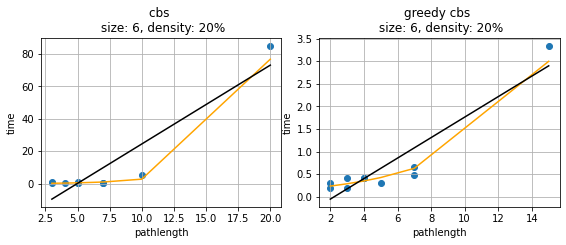

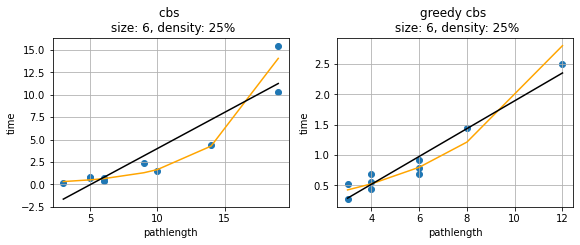

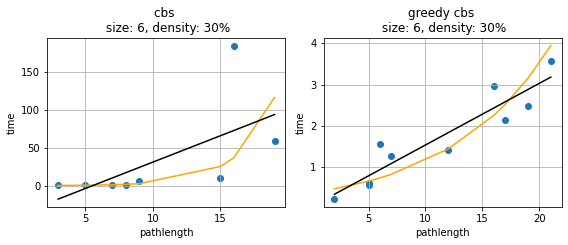

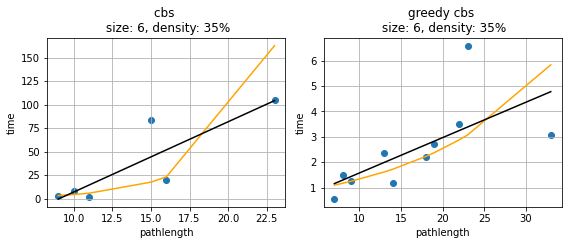

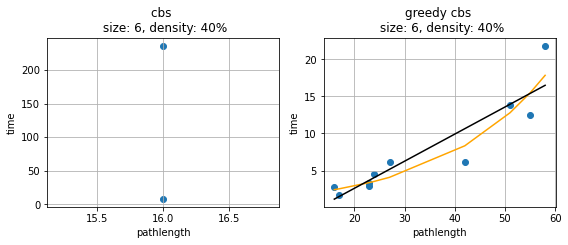

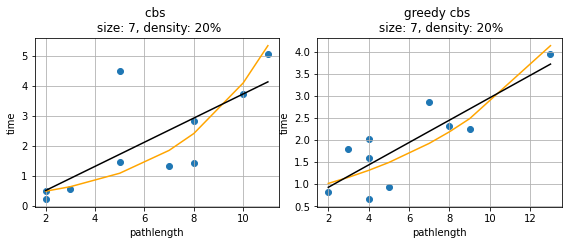

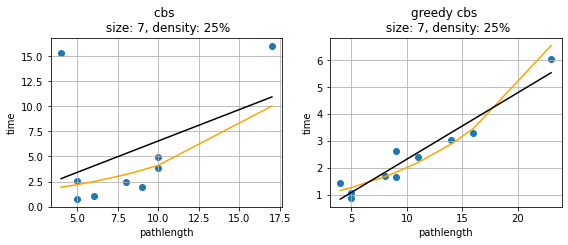

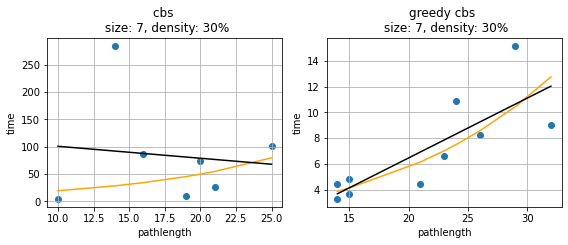

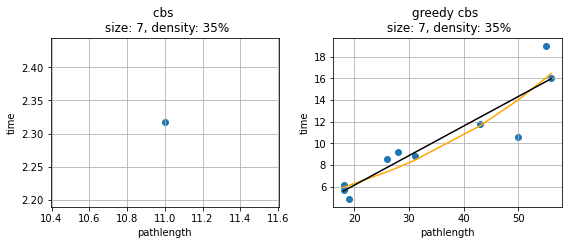

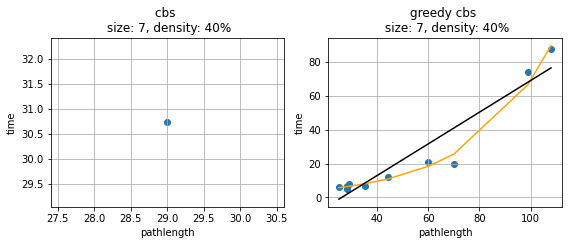

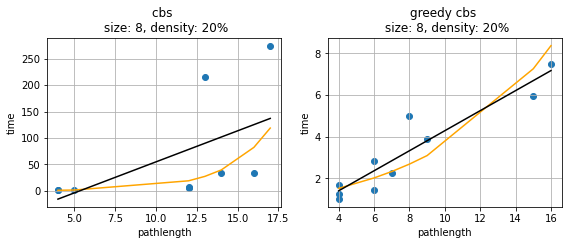

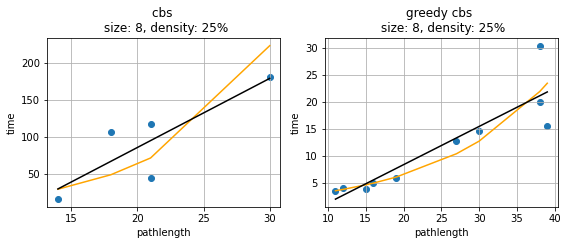

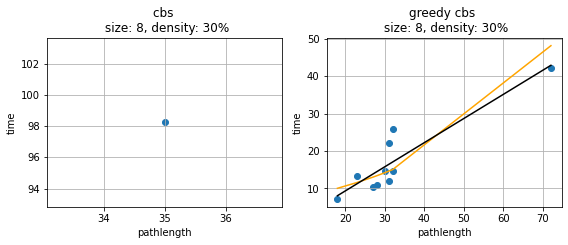

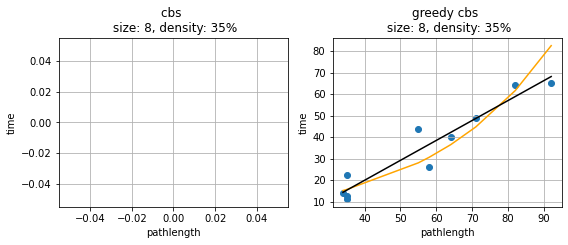

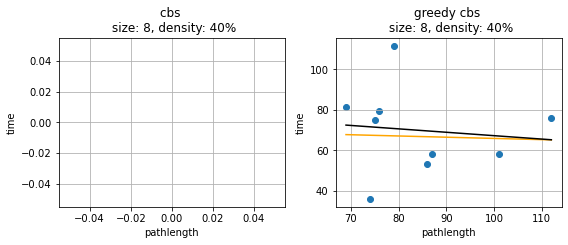

In [17]:
compareScatterTimeExp(catList, greedyCatList, 'pathlength')
#Besonders in interessant! ng logorithmisch, g linear?

#plt.savefig('fig.png')

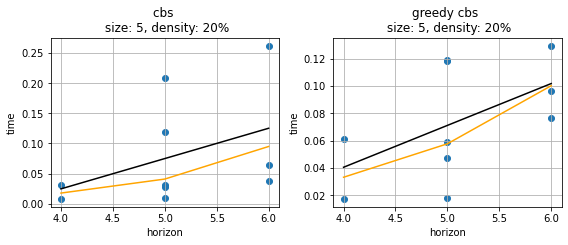

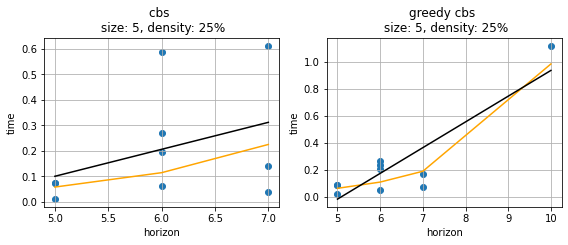

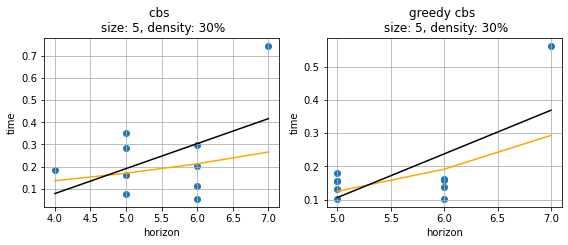

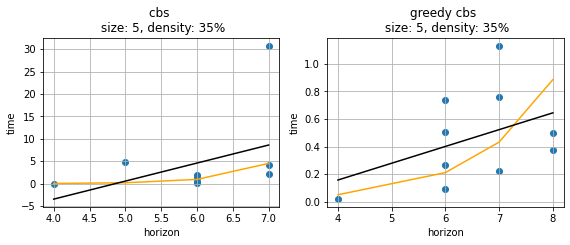

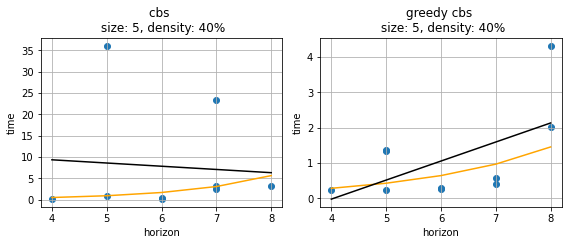

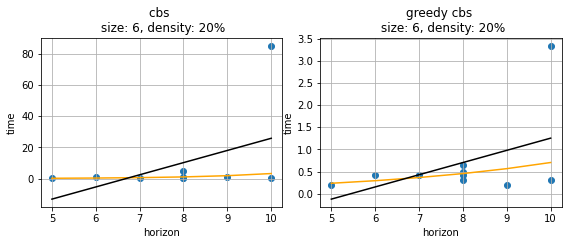

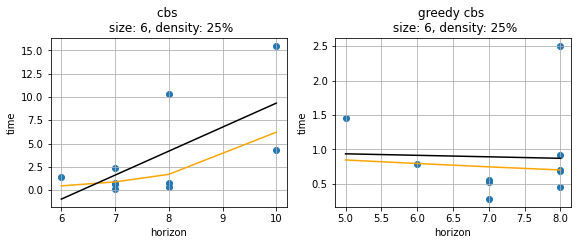

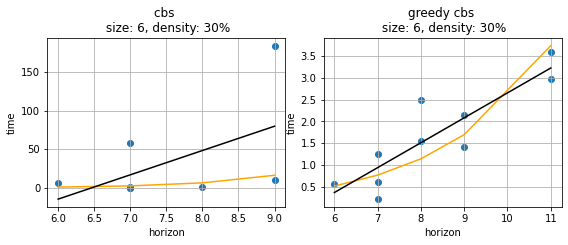

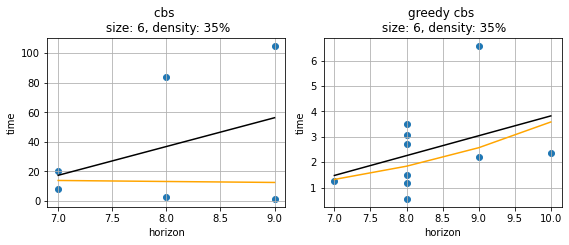

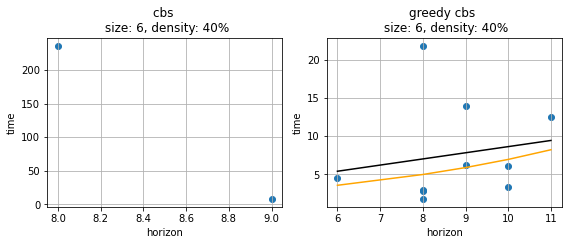

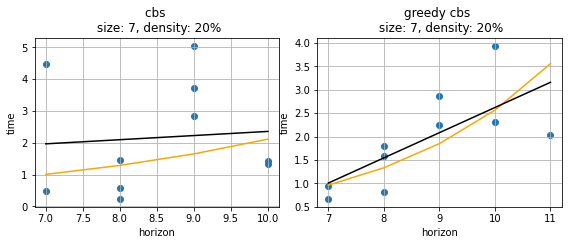

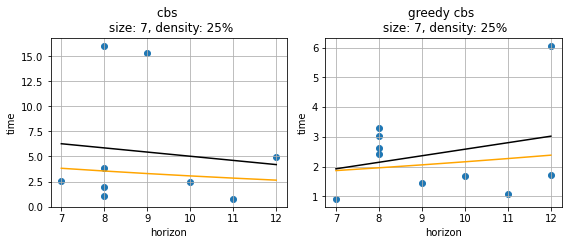

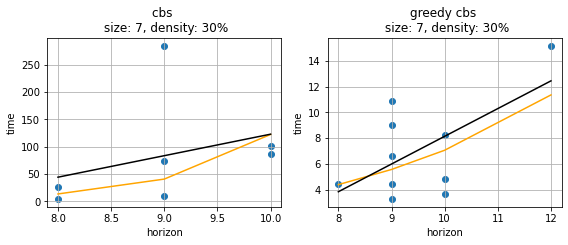

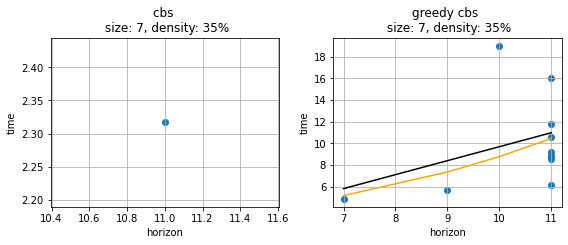

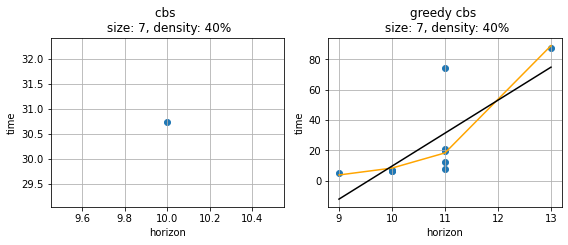

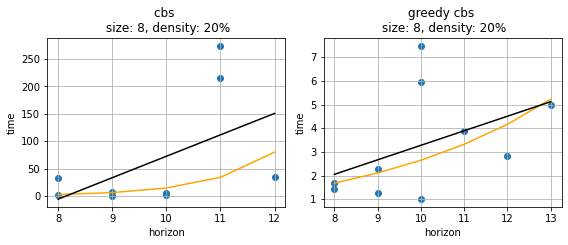

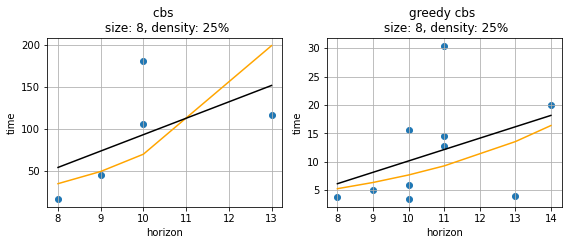

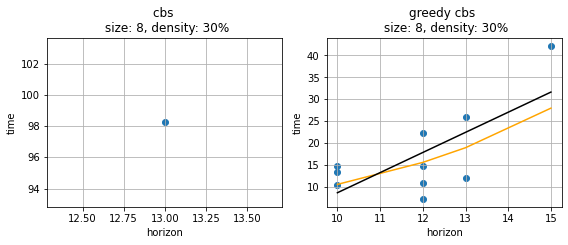

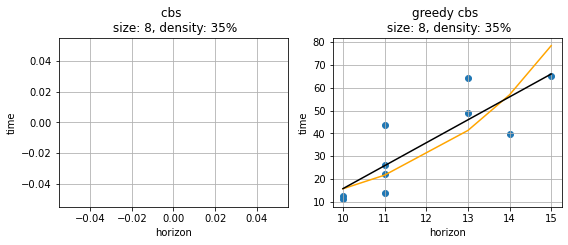

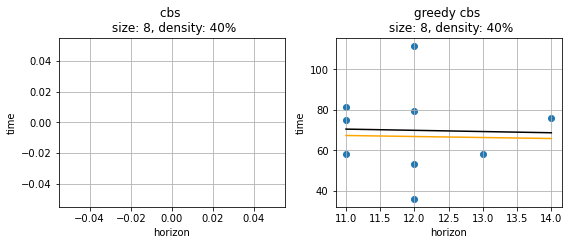

In [18]:
compareScatterTimeExp(catList, greedyCatList, 'horizon')

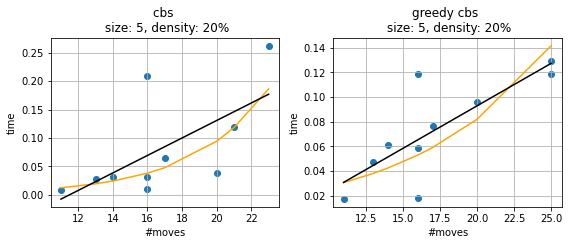

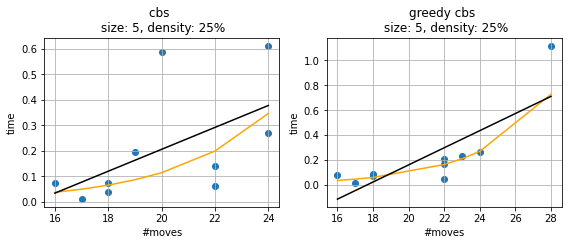

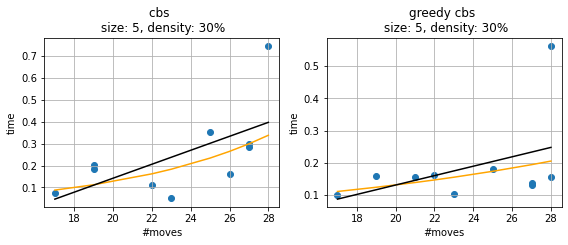

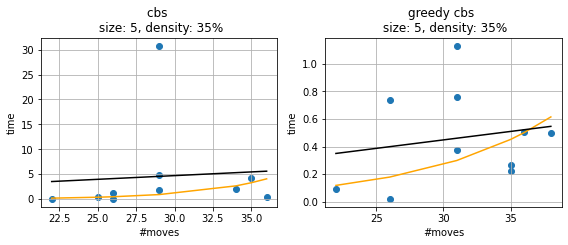

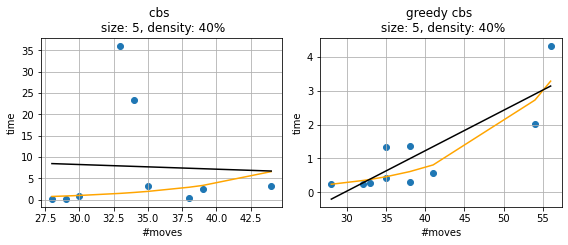

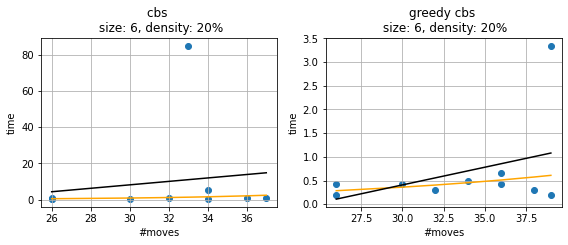

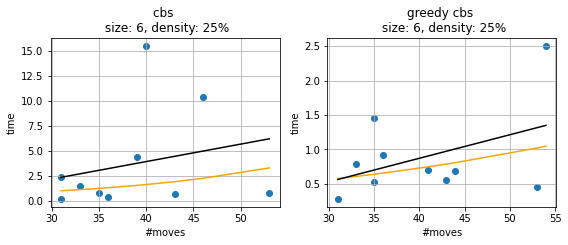

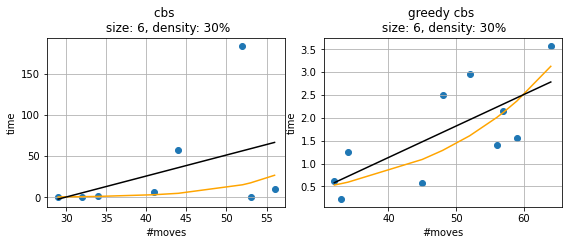

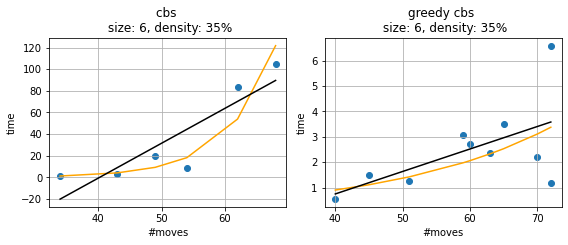

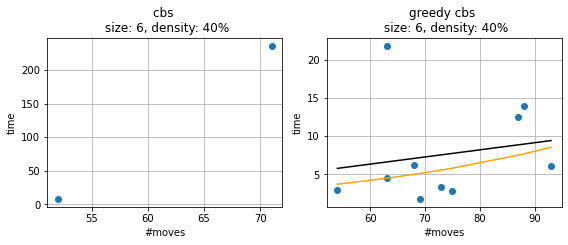

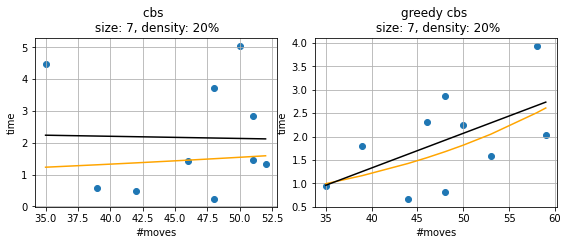

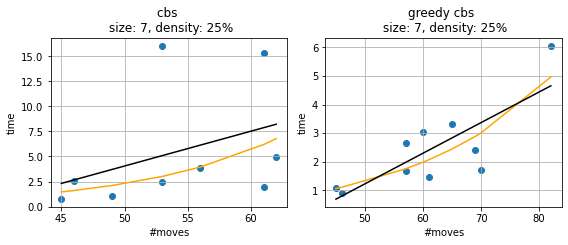

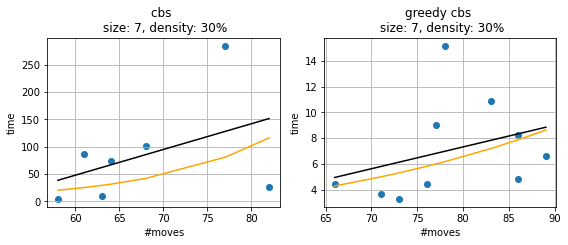

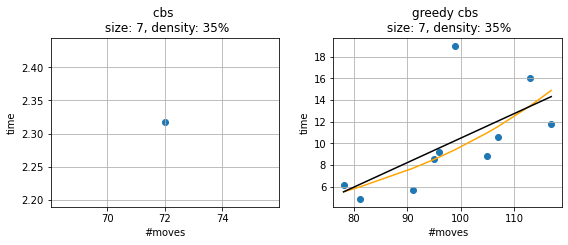

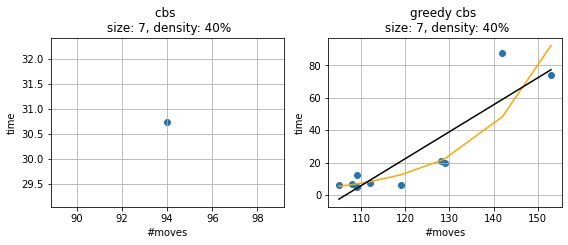

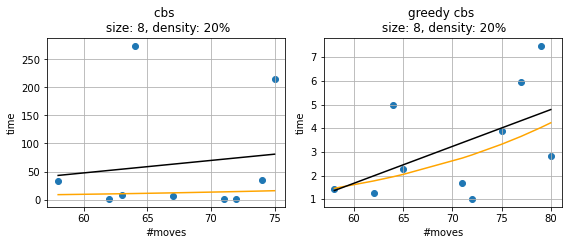

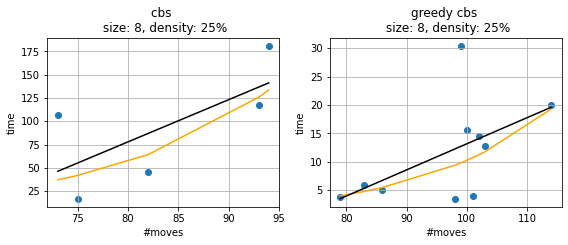

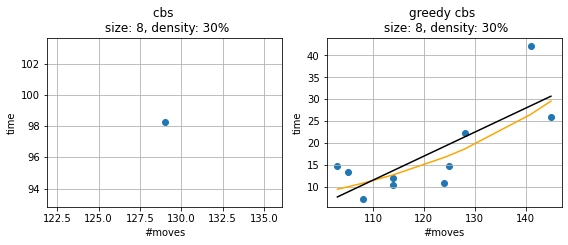

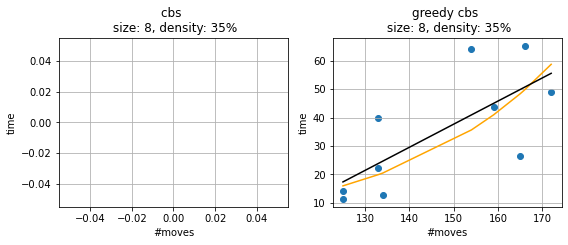

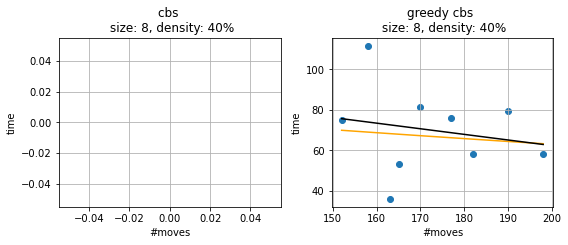

In [19]:
compareScatterTimeExp(catList, greedyCatList, '#moves')

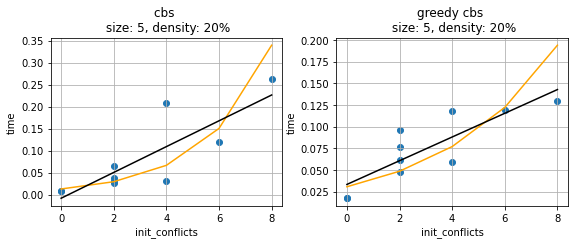

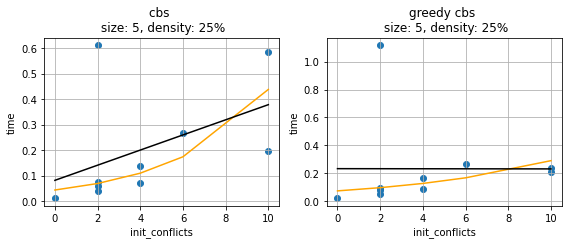

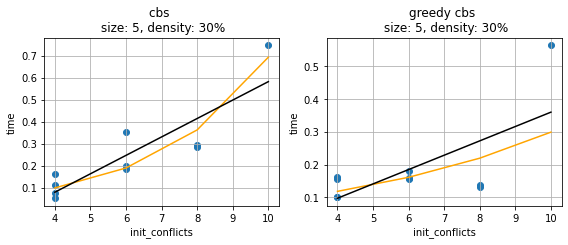

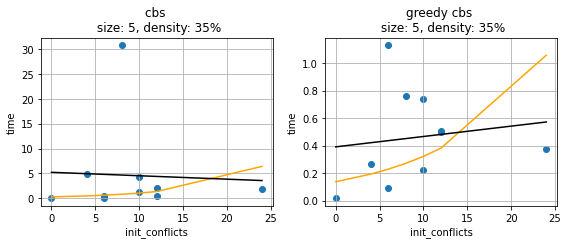

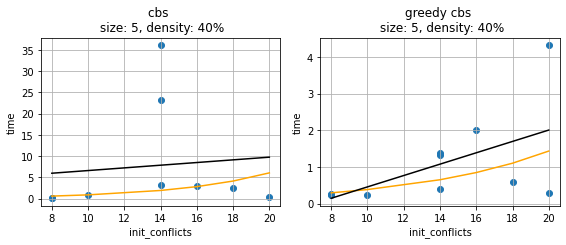

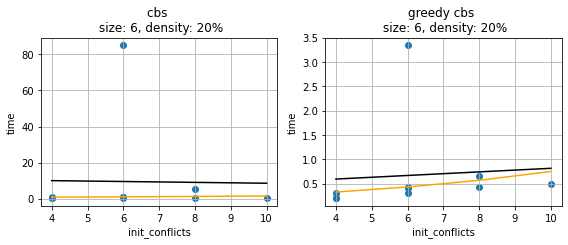

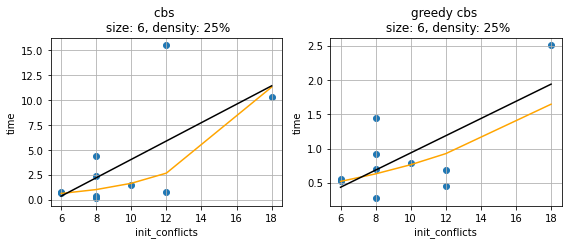

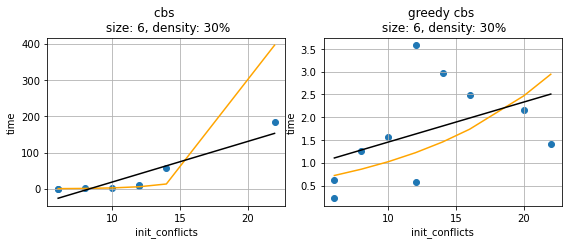

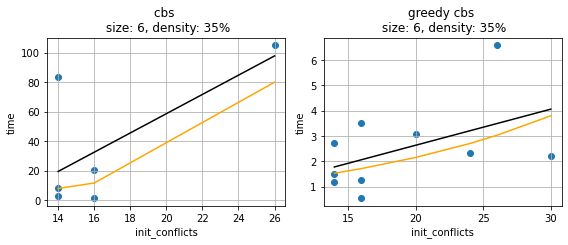

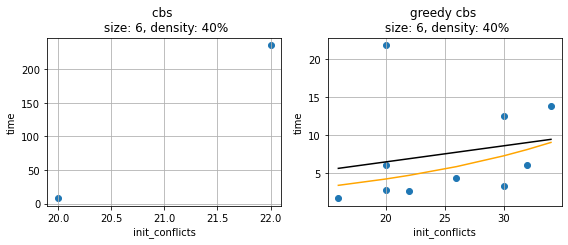

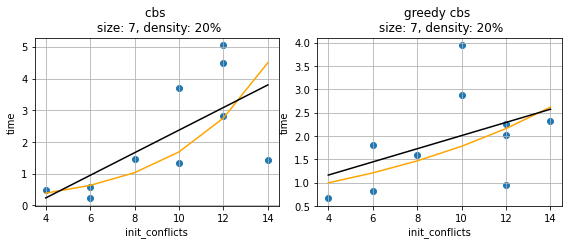

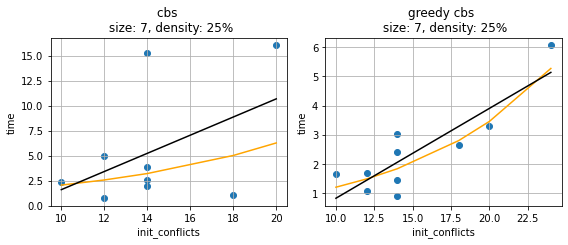

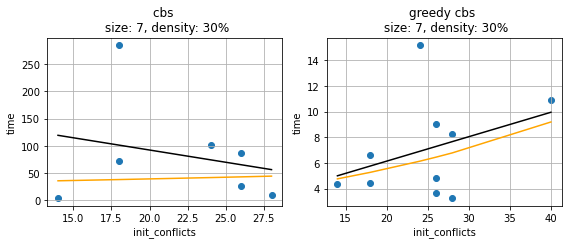

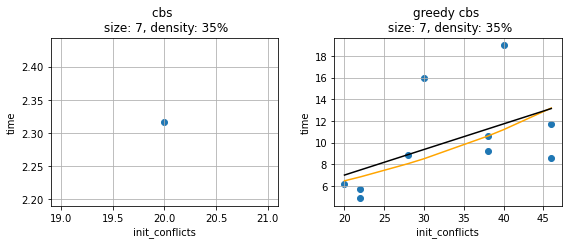

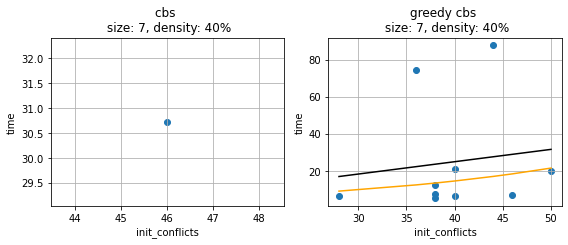

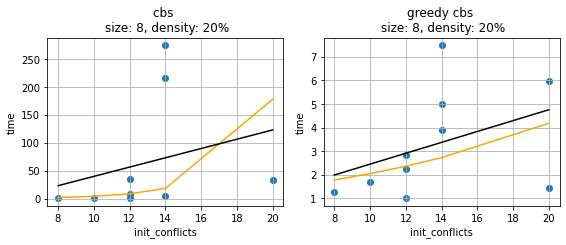

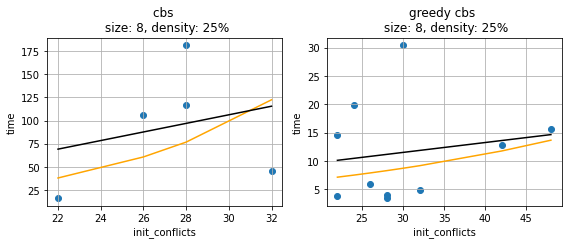

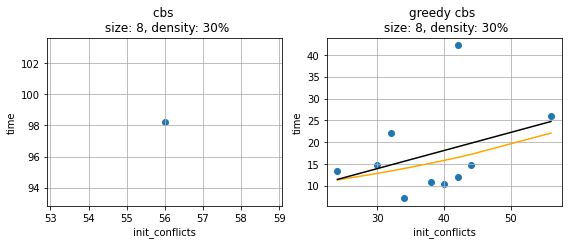

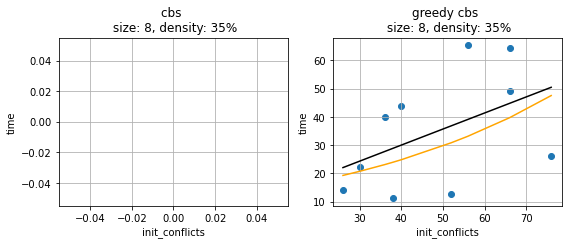

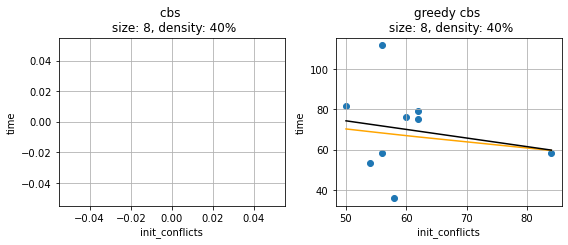

In [20]:
compareScatterTimeExp(catList, greedyCatList, 'init_conflicts')

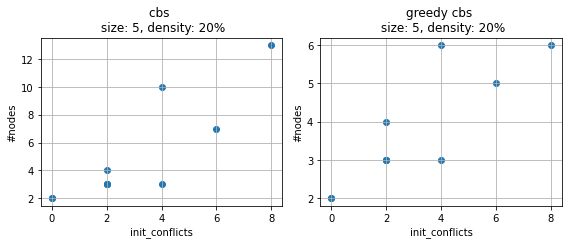

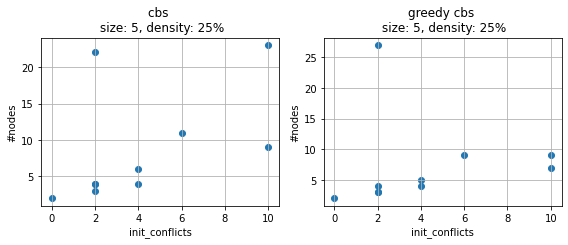

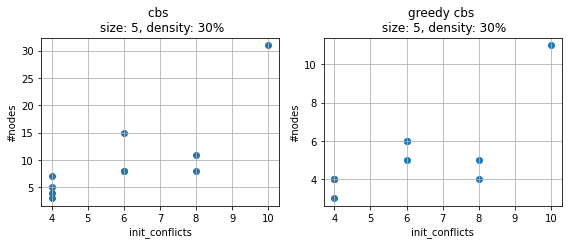

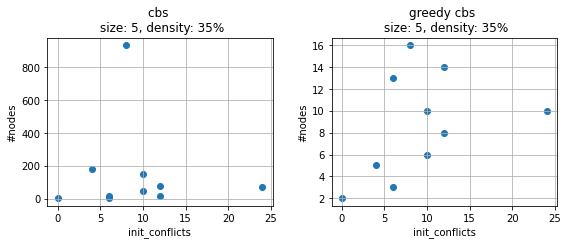

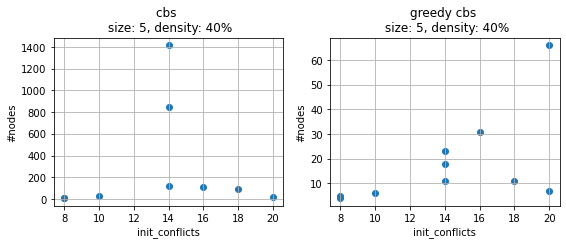

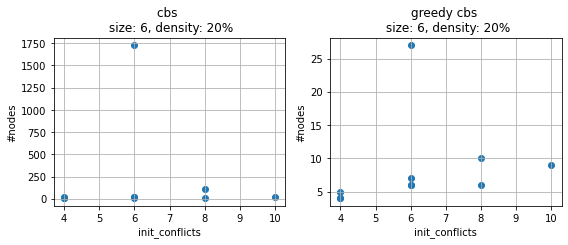

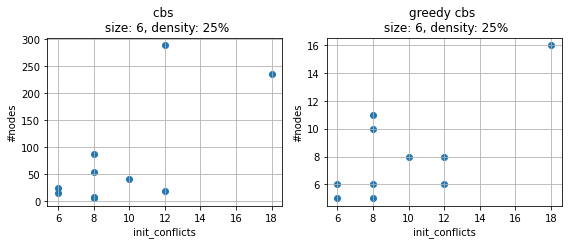

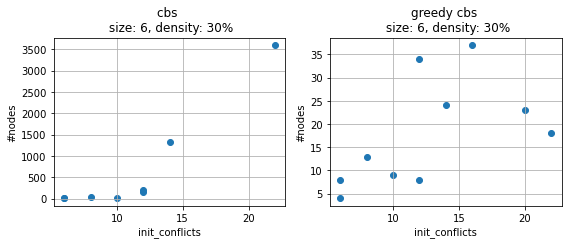

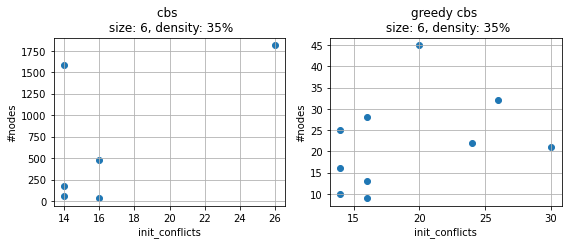

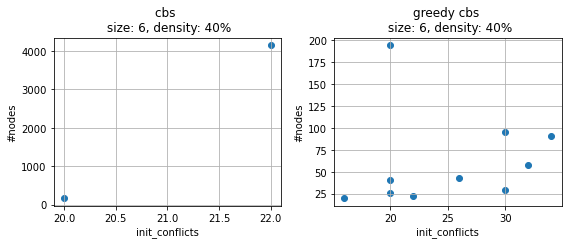

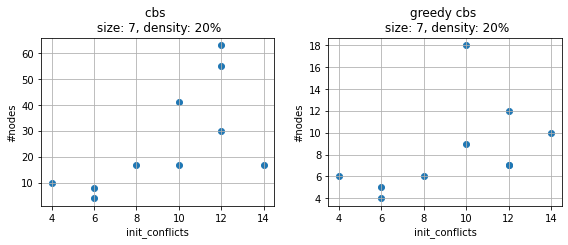

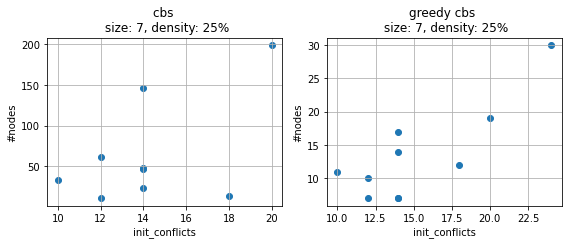

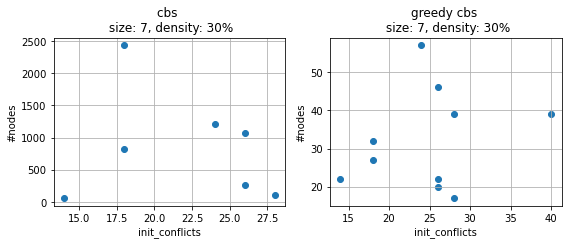

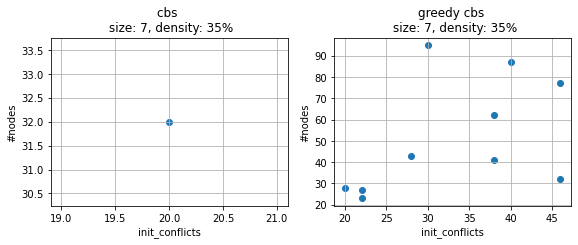

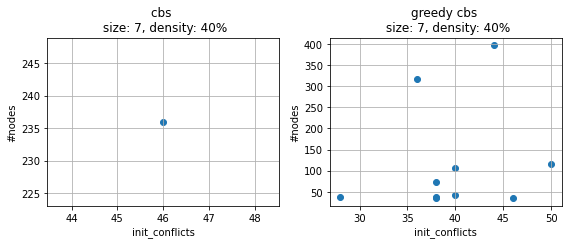

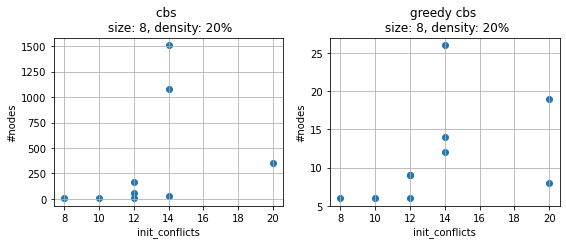

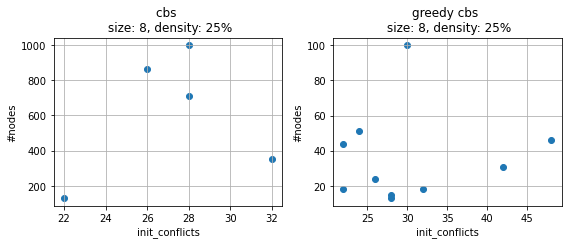

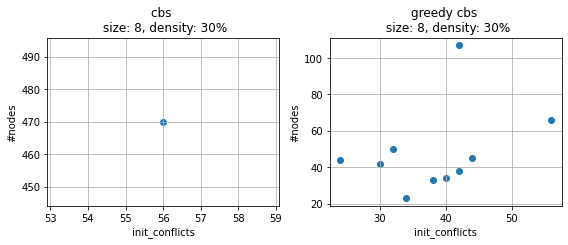

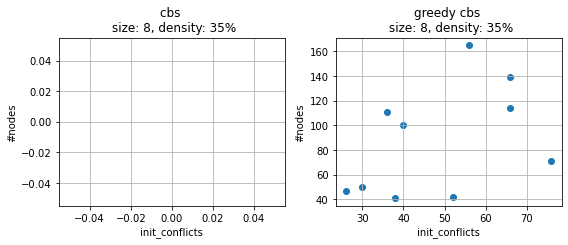

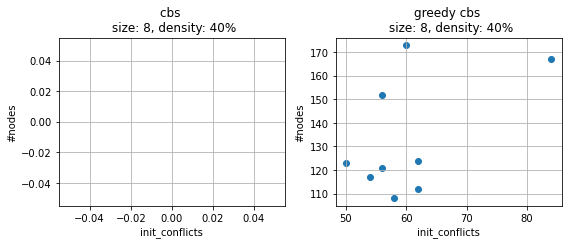

In [21]:
compareScatter(catList, greedyCatList, 'init_conflicts', '#nodes')

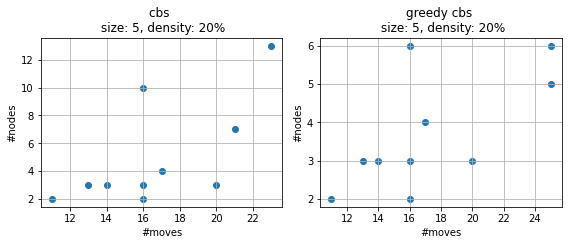

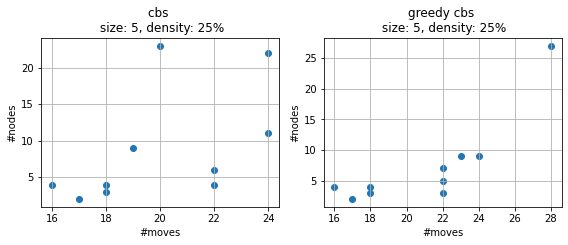

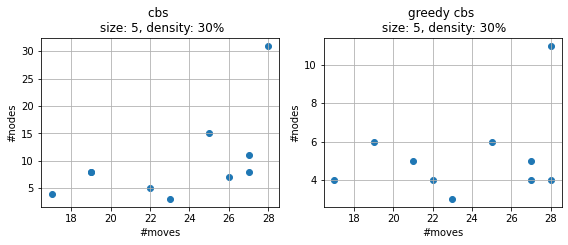

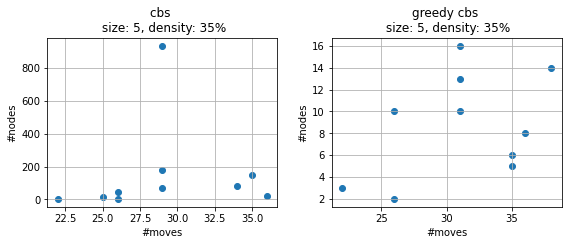

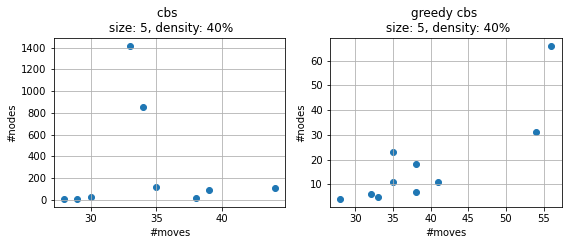

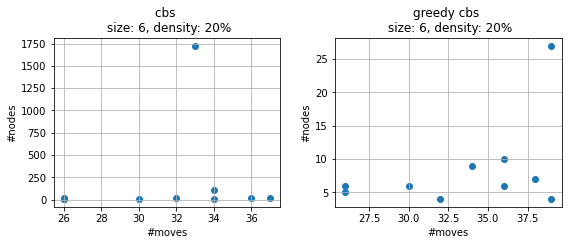

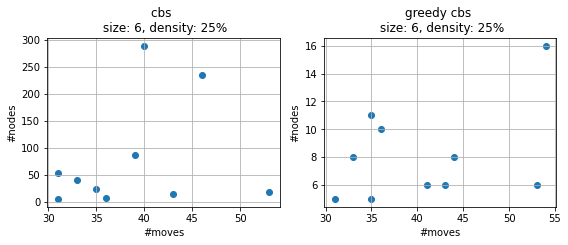

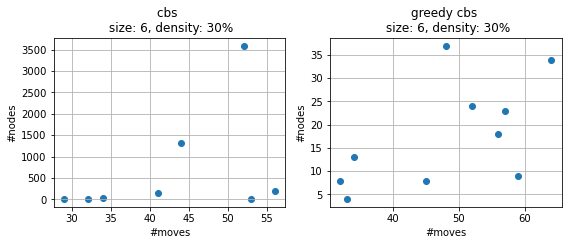

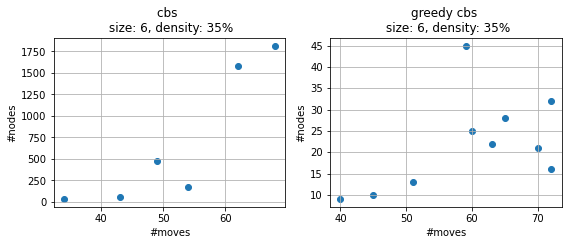

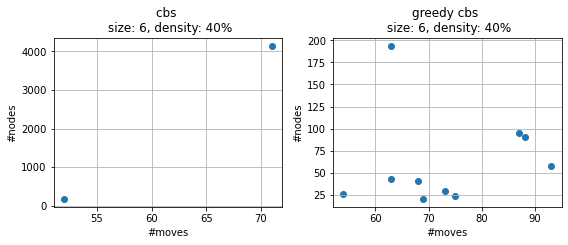

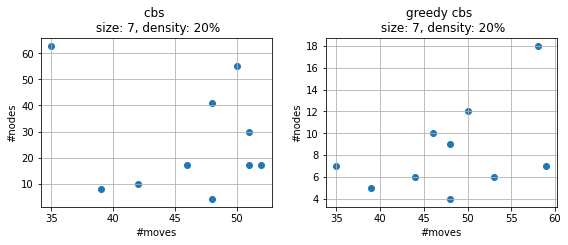

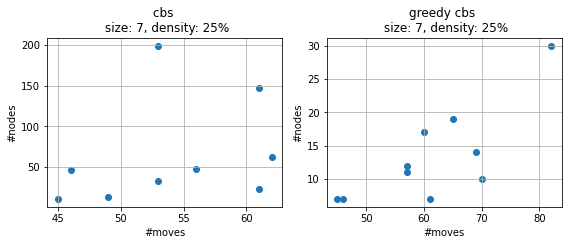

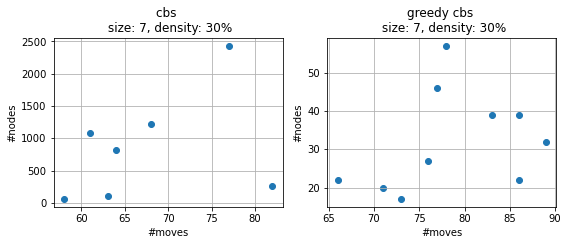

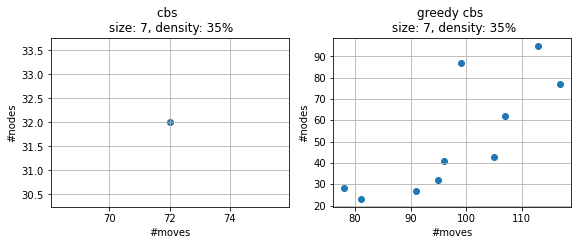

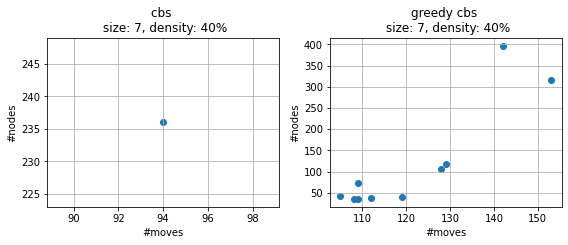

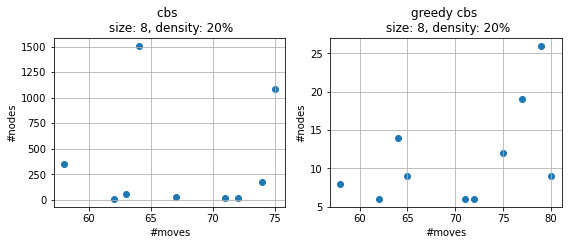

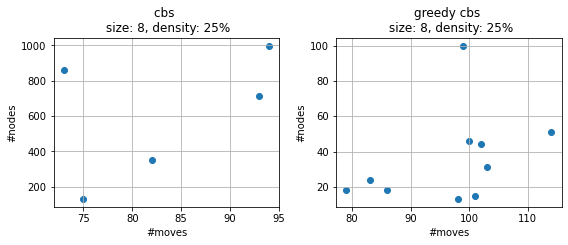

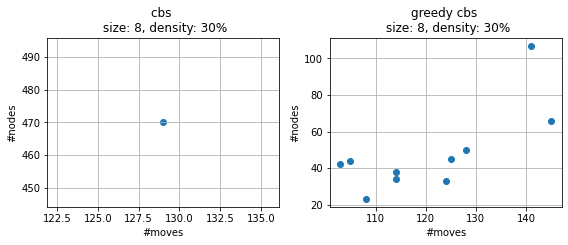

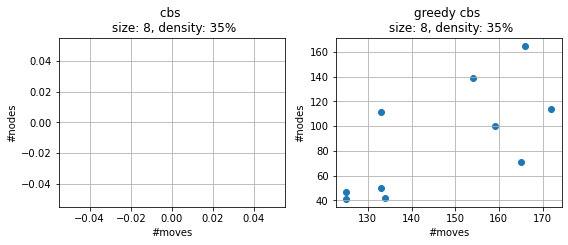

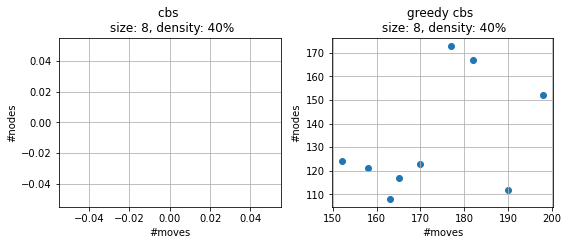

In [22]:
compareScatter(catList, greedyCatList, '#moves', '#nodes')

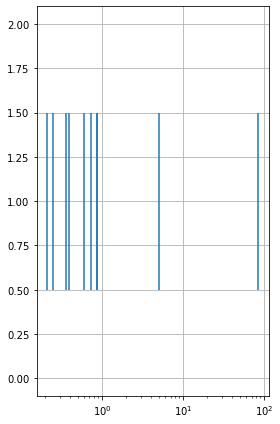

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

plt.xscale('log')

ax1.eventplot(list(catList[5]['time']))

fig.set_size_inches(4, 6, forward=True)
fig.tight_layout()


ax1.grid()

plt.show()

[ 0.07997404  0.20635756  0.24728496  4.59471457 36.97470663]


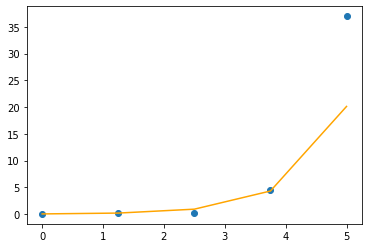

In [24]:
# curve fitting
from scipy.interpolate import interp1d

x_data = np.linspace(0,5, num=5)
y_data = np.array(mean[:5])
print(y_data)


ylog_data = np.log(y_data)  
curve_fit = np.polyfit(x_data, ylog_data, 1)
y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*x_data)

plt.scatter(x_data, y_data)

plt.plot(x_data, y, c='orange')
plt.show()

In [41]:
inc_cbs1 = pd.read_csv("inc_benchmarkResults/cbs1.csv")
inc_cbs2 = pd.read_csv("inc_benchmarkResults/cbs2.csv")
inc_cbs3 = pd.read_csv("inc_benchmarkResults/cbs3.csv")

inc_greedy1 = pd.read_csv("inc_benchmarkResults/greedyUpTo35robs1.csv")
inc_greedy2 = pd.read_csv("inc_benchmarkResults/greedyUpTo35robs2.csv")
inc_greedy3 = pd.read_csv("inc_benchmarkResults/greedyUpTo35robs3.csv")

In [46]:
def num(row):
    try:
        int(row['time'])
        return int(str(row["file"]).split("/")[-1].split("r")[0])
    except: 
        return np.nan

inc_cbs1['num'] = inc_cbs1.apply(lambda row: num(row), axis=1)
inc_cbs2['num'] = inc_cbs2.apply(lambda row: num(row), axis=1)
inc_cbs3['num'] = inc_cbs3.apply(lambda row: num(row), axis=1)

inc_greedy1['num'] = inc_greedy1.apply(lambda row: num(row), axis=1)
inc_greedy2['num'] = inc_greedy2.apply(lambda row: num(row), axis=1)
inc_greedy3['num'] = inc_greedy3.apply(lambda row: num(row), axis=1)

In [47]:
def plotIncLog(dataframe, category, firstConflictOccurence, size, mode):
    # [x, y]
    data = np.array([list(dataframe['num']), list(dataframe[category])])
    # data sorted by pathlength (x values)
    data = data[:, np.argsort( data[0] ) ]
      
    # remove NaN values
    new_data = []
    for arr in data:
        newrow = arr[~np.isnan(arr)]
        new_data.append(list(newrow))
        
    ax1.scatter(new_data[0], new_data[1])
        
    # log plot cbs
    ylog_data = np.log(new_data[1]) 
    curve_fit = np.polyfit(new_data[0], ylog_data, 1)
    y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*np.array(new_data[0]))
    
    dataframe.plot(x="num", y=category, label="solving speed when num of robots gradually increased", kind="scatter")
    plt.vlines(firstConflictOccurence + 0.5, 10^(-2), size, label="first conflict occurs", color="red")        
    plt.plot(new_data[0], y, c='orange')
    x = 0
    for i in dataframe['time'].isna():
        if(i):
            plt.scatter(dataframe['num'][x], [300], color = 'red')
        x+=1
    plt.legend()
    plt.show()
    
def plotInc(dataframe, category, firstConflictOccurence, size, mode):
    dataframe.plot(x="num", y=category, label="initial conflicts when num of robots gradually increased", kind="scatter", ylim=(-2, size), xlim=(1,mode))
    plt.legend()
    plt.show()

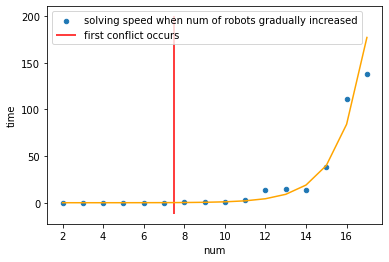

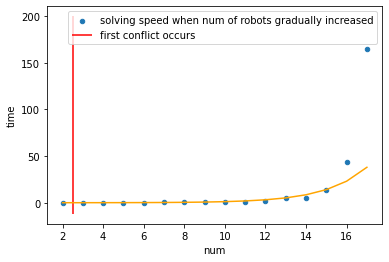

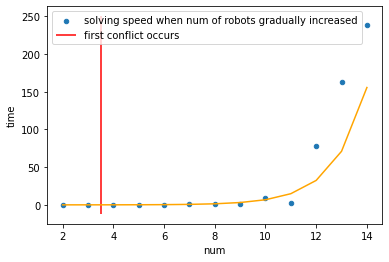

In [48]:
plotIncLog(inc_cbs1, 'time', 7, 200, 18)
plotIncLog(inc_cbs2, 'time', 2, 200, 18)
plotIncLog(inc_cbs3, 'time', 3, 250, 18)

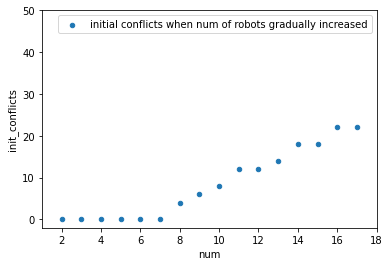

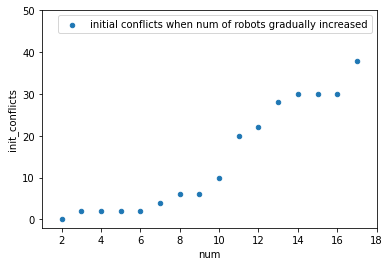

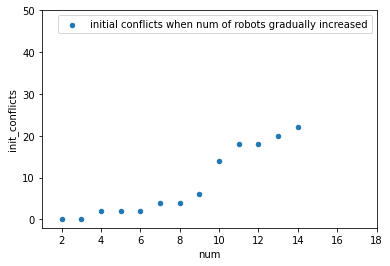

In [49]:
plotInc(inc_cbs1, 'init_conflicts', 7, 50, 18)
plotInc(inc_cbs2, 'init_conflicts', 2, 50, 18)
plotInc(inc_cbs3, 'init_conflicts', 3, 50, 18)
#Das hier ist eigentlich unwichtig, wenn wie es mit der rob 35 machen

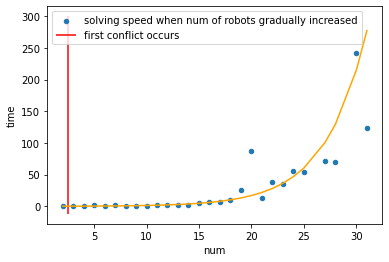

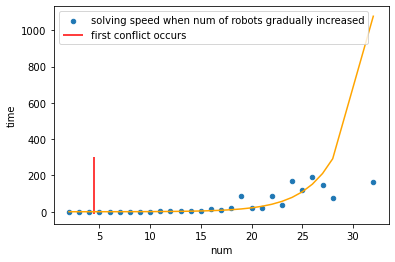

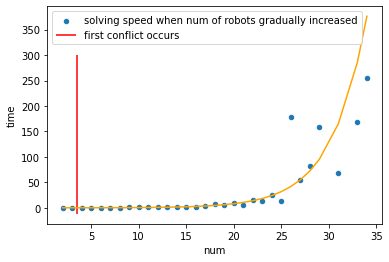

In [50]:
plotIncLog(inc_greedy1, 'time', 2, 300, 35)
plotIncLog(inc_greedy2, 'time', 4, 300, 35)
plotIncLog(inc_greedy3, 'time', 3, 300, 35)

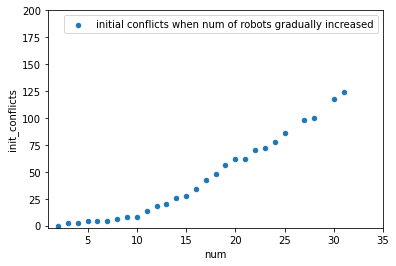

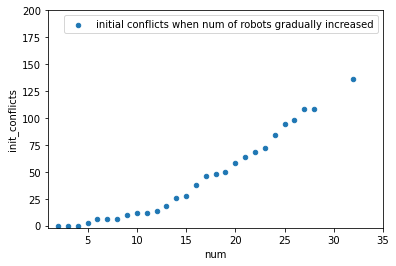

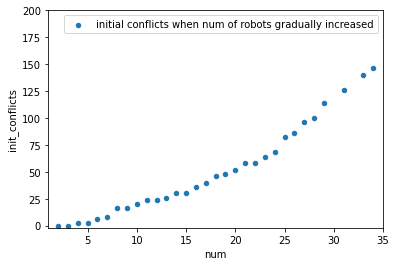

In [51]:
plotInc(inc_greedy1, 'init_conflicts', 7, 200, 35)
plotInc(inc_greedy2, 'init_conflicts', 2, 200, 35)
plotInc(inc_greedy3, 'init_conflicts', 3, 200, 35)

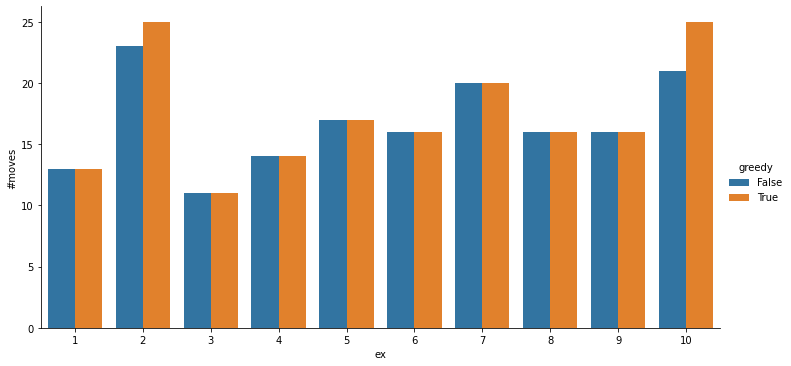

In [52]:
new_df = pd.DataFrame()
new_df['ex'] = catList[0]['ex']
new_df['#moves'] = catList[0]['#moves']
new_df.insert(loc=1, column='greedy', value=False, allow_duplicates=True)

new_gdf = pd.DataFrame()
new_gdf['ex'] = greedyCatList[0]['ex']
new_gdf['#moves'] = greedyCatList[0]['#moves']
new_gdf.insert(loc=1, column='greedy', value=True, allow_duplicates=True)

plotdf = new_df.append(new_gdf)
plotdf


import seaborn as sns

sns.catplot(x='ex', y='#moves', hue='greedy', aspect=2, data=plotdf, dodge=True, kind='bar')
#plt.xticks(rotation=315)
plt.show()